In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Path style access for pandas
!pip install pandas-path
from pandas_path import path

import rasterio

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import jaccard_score

In [2]:
def numpy_mask(image_path):
    with rasterio.open(image_path) as img:
        metadata = img.meta
        bounds = img.bounds
        data = img.read(1)  # read a single band

    with rasterio.open(image_path) as img:
        return img.read(1)

# Get the metadata dataframe

In [3]:
# This is where our downloaded images and metadata live locally
DATA_PATH = Path.cwd().parent / "runtime" / "data" / "train_features"
train_metadata = pd.read_csv(
    DATA_PATH / "flood-training-metadata.csv", parse_dates=["scene_start"]
)

train_metadata = train_metadata.iloc[::2]
train_metadata.reset_index(inplace=True, drop=True)
train_metadata['flood_id'].unique()

array(['awc', 'ayt', 'coz', 'hbe', 'hxu', 'jja', 'kuo', 'pxs', 'qus',
       'qxb', 'tht', 'tnp', 'wvy'], dtype=object)

In [4]:
PRED_PATH = Path.cwd().parent / "test submission" / "codeexecution"
train_metadata["pred_path"] = (
    str(PRED_PATH / "submission")
    / train_metadata.chip_id.path.with_suffix(".tif").path
)

train_metadata["label_path"] = (
    str(DATA_PATH / "train_labels")
    / train_metadata.chip_id.path.with_suffix(".tif").path
)

# Calculate the jaccard score for every prediction

In [5]:
from pathlib import Path
from loguru import logger
import numpy as np
from tifffile import imread
import typer
from tqdm import tqdm

NA_VALUE = 255

In [6]:
def iterate_through_mask_pairs(submission_dir: Path, actual_dir: Path):
    """
    For each tif in the actual directory, find the corresponding prediction tif, read
    them both in, and yield the (pred, actual) tuple
    """
    for actual_path in actual_dir.glob("*.tif"):
        filename = actual_path.name
        predicted_path = submission_dir / filename
        assert predicted_path.exists(), f"Could not find expected file: {filename}"
        actual = imread(actual_path)
        pred = imread(predicted_path)
        yield pred, actual

In [7]:
def intersection_over_union(df, total=None):
    """Calculate the actual metric"""
    intersection = 0
    union = 0
    for pred, actual in tqdm(array_pairs, total=total):
        invalid_mask = actual == NA_VALUE
        actual = np.ma.masked_array(actual, invalid_mask)
        pred = np.ma.masked_array(pred, invalid_mask)
        intersection += np.logical_and(actual, pred).sum()
        union += np.logical_or(actual, pred).sum()
    if union < 1:
        raise ValueError("At least one image must be in the actual data set")
    return intersection / union

In [11]:
submission_dir = Path.cwd().parent / "test submission" / "codeexecution" / "submission"
actual_dir = Path.cwd().parent / "runtime" / "data" / "train_features" / "train_labels"

n_expected = len(list(actual_dir.glob("*.tif")))
array_pairs = iterate_through_mask_pairs(submission_dir, actual_dir)
logger.info(f"calculating score for {n_expected} image pairs ...")
score = intersection_over_union(array_pairs, total=n_expected)
logger.success(f"overall score: {score}")

2021-09-20 14:46:46.115 | INFO     | __main__:<module>:6 - calculating score for 542 image pairs ...
100%|██████████| 542/542 [00:06<00:00, 87.25it/s]
2021-09-20 14:46:52.329 | SUCCESS  | __main__:<module>:8 - overall score: 0.7161506369672593


In [9]:
0.7154071963726579 1
0.7168819227650541 1+2
0.7184436661452285 1+2+3
0.7161512246920856 1+2+3+4
0.7148467283147324 1+2+4
0.7182936444410202 1+2+5
0.7161506369672593 1+2+3+4+5

0.7168819227650541

# Display the label and prediction

In [10]:
def display(df, id_): 
    pred = numpy_mask(df['pred_path'][id_])
    label = numpy_mask(df['label_path'][id_])
    f, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(pred, "gray")
    ax[0].set_title("prediction")
    ax[1].imshow(label, "gray")
    ax[1].set_title("label")
    plt.show()

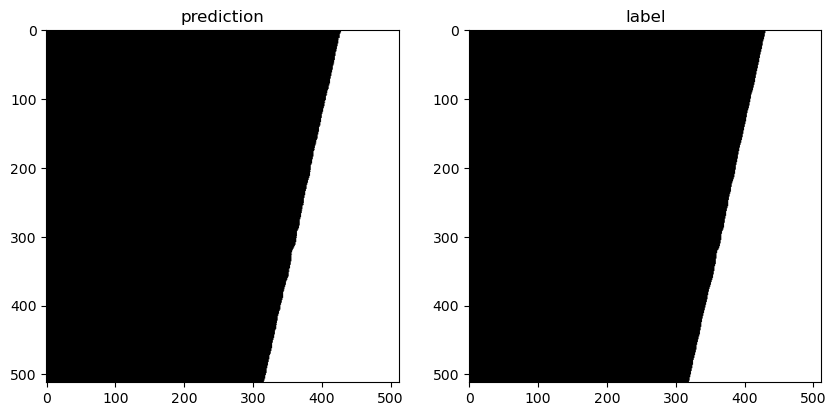

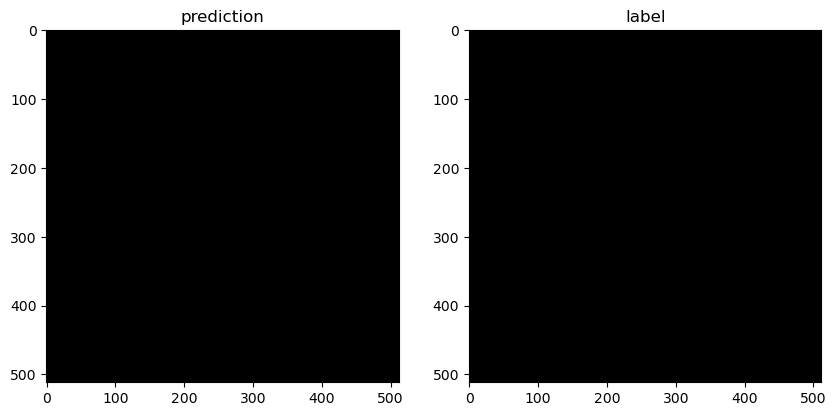

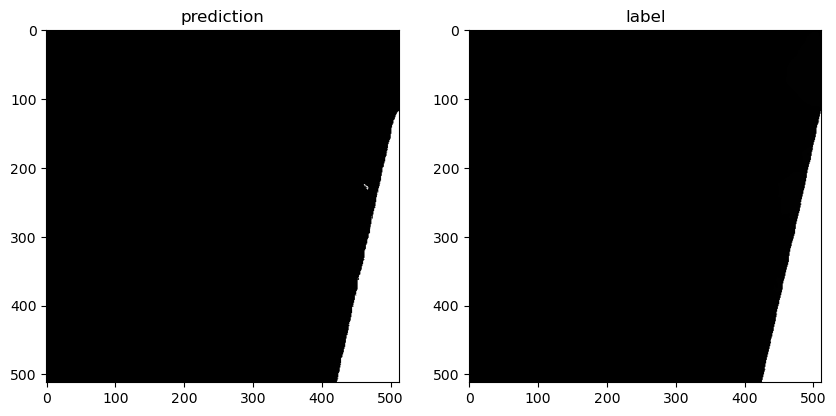

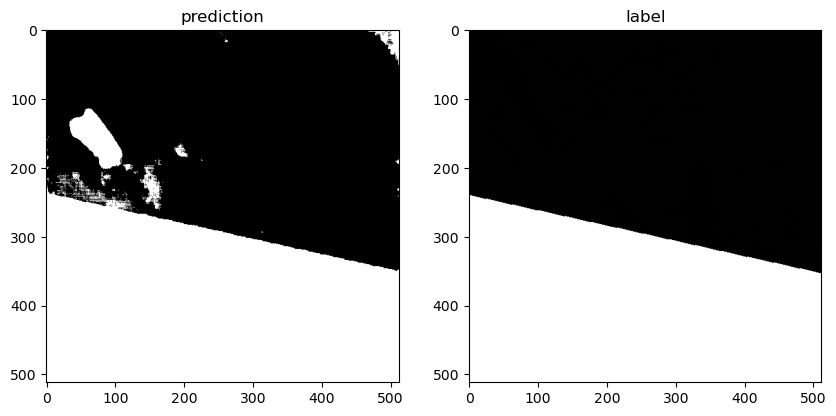

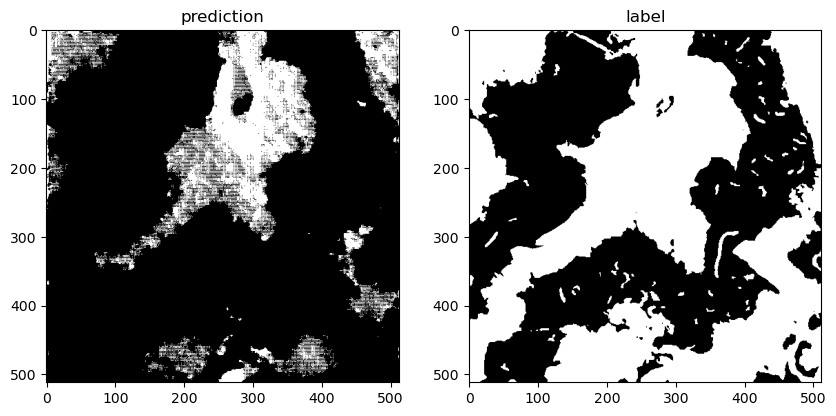

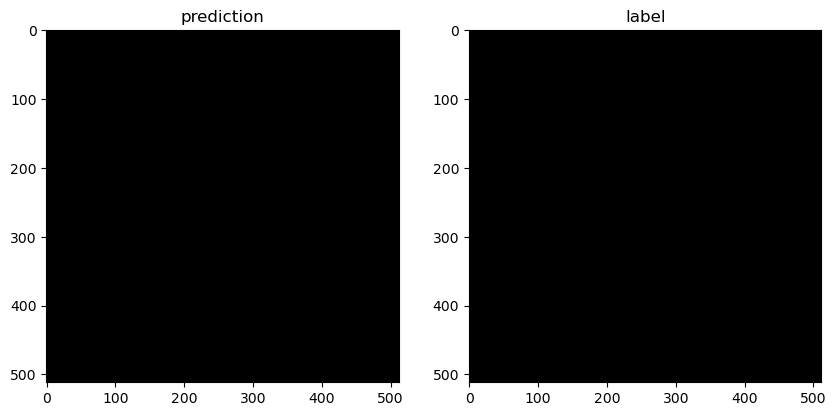

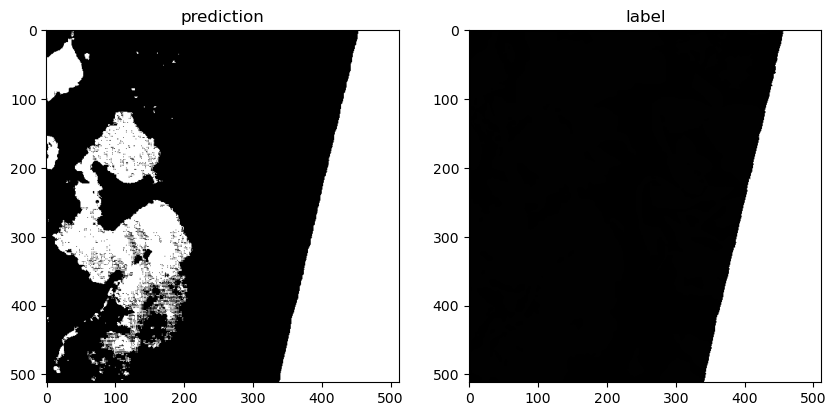

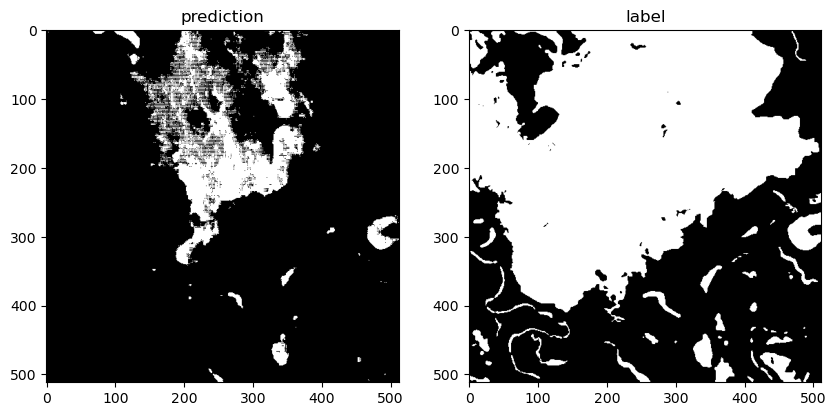

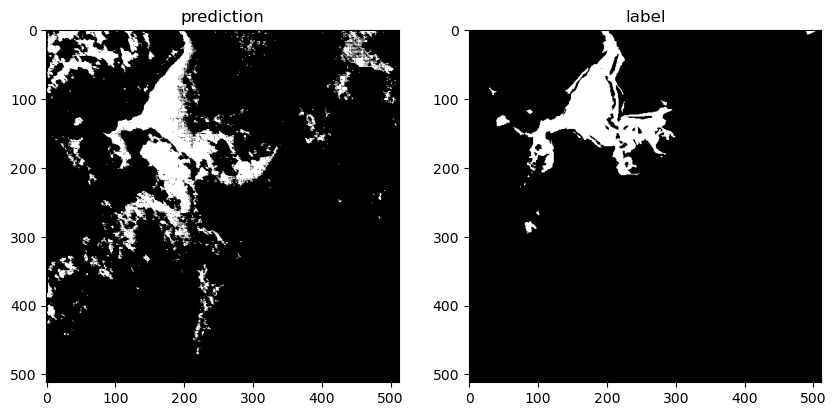

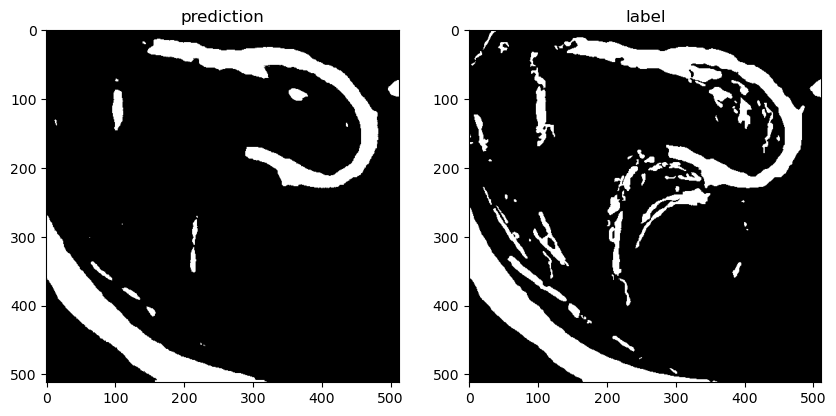

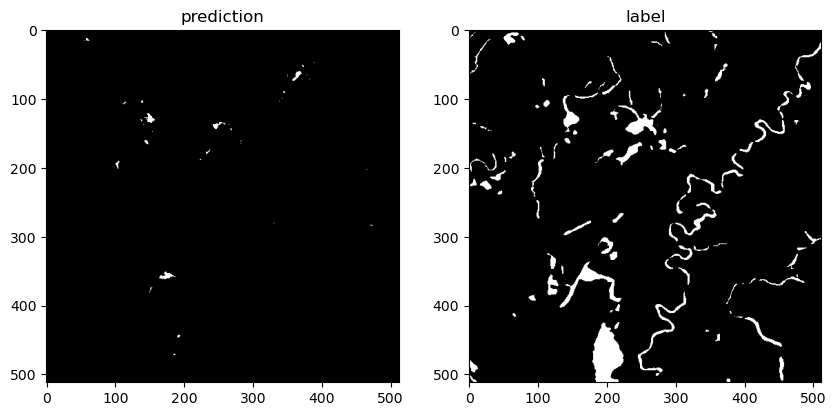

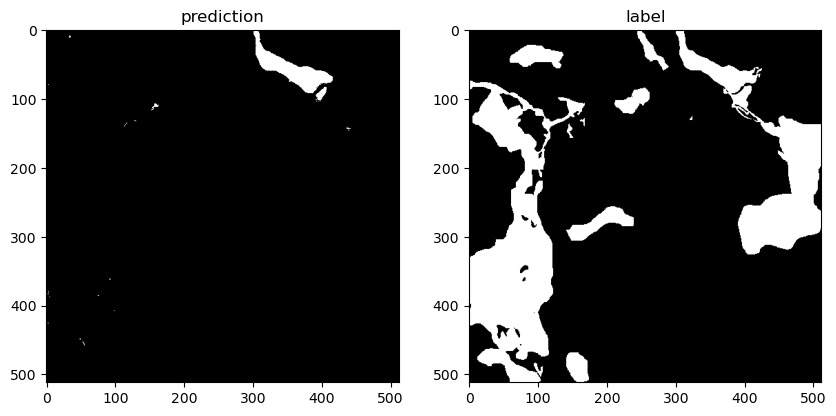

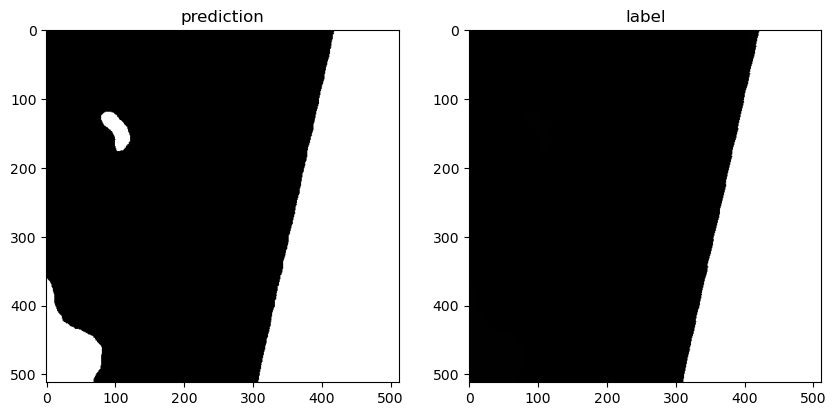

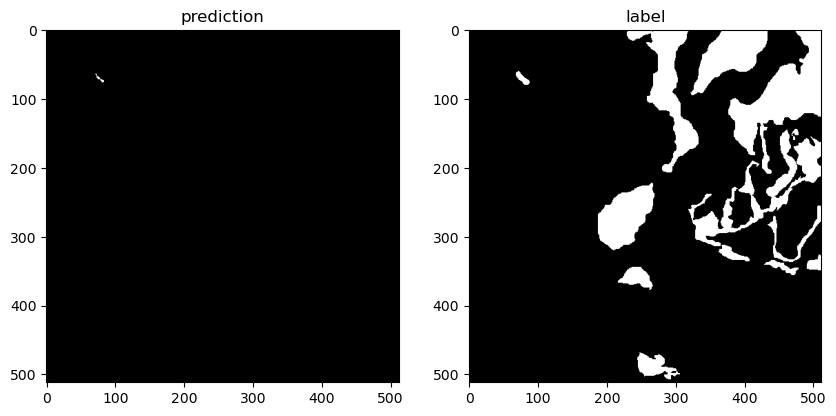

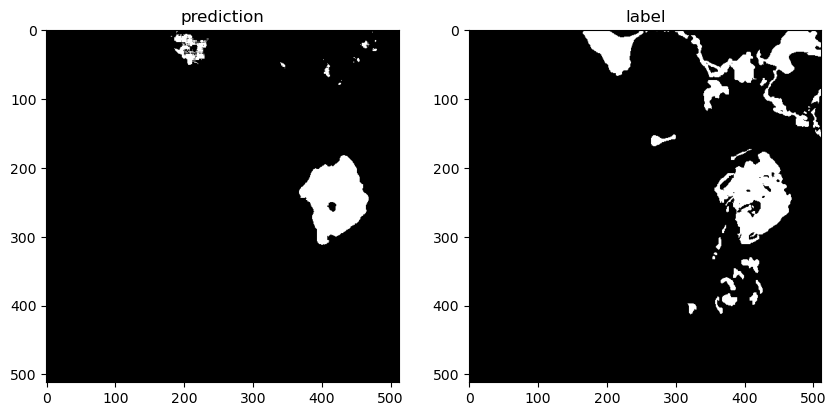

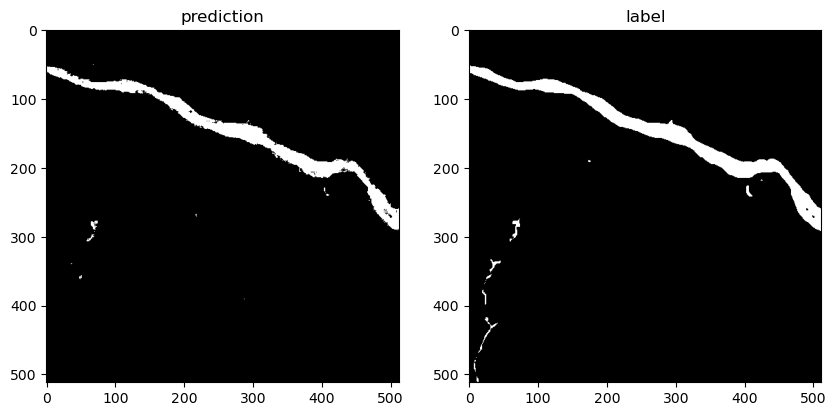

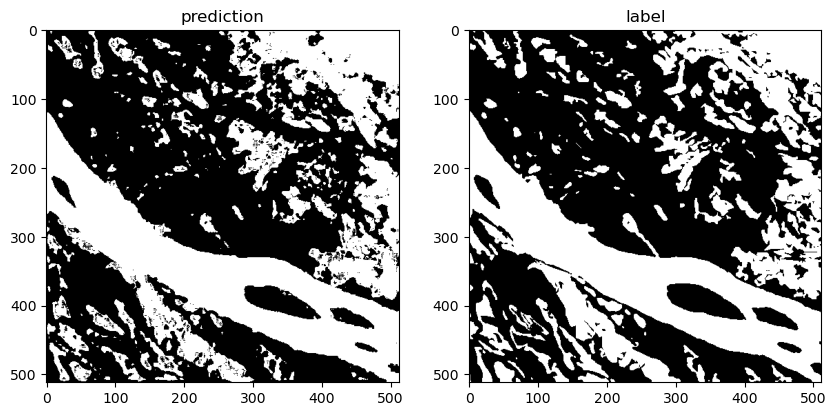

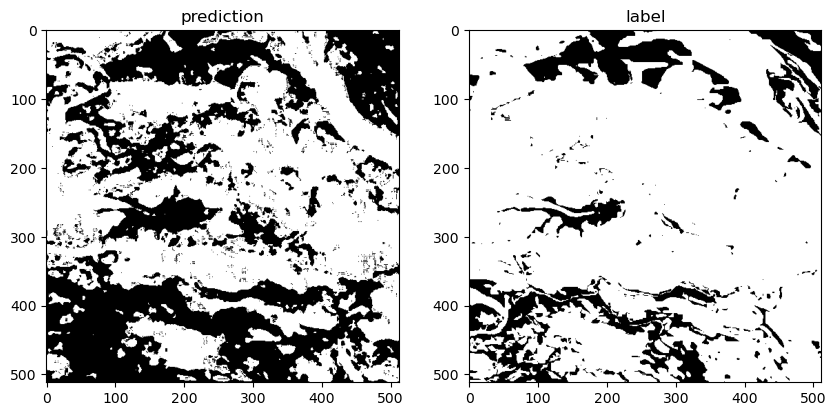

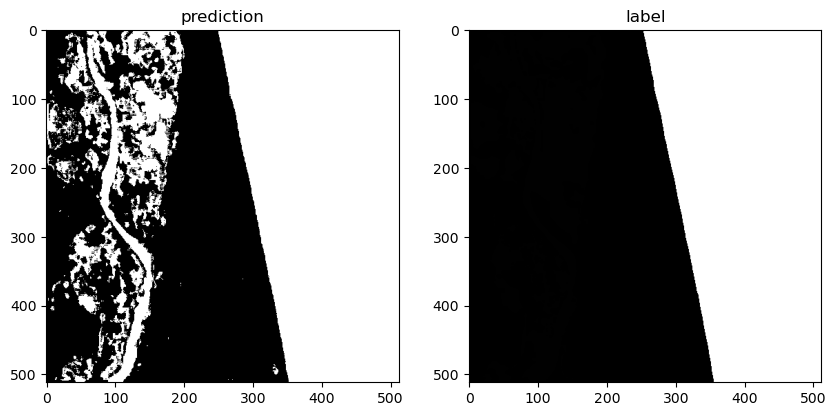

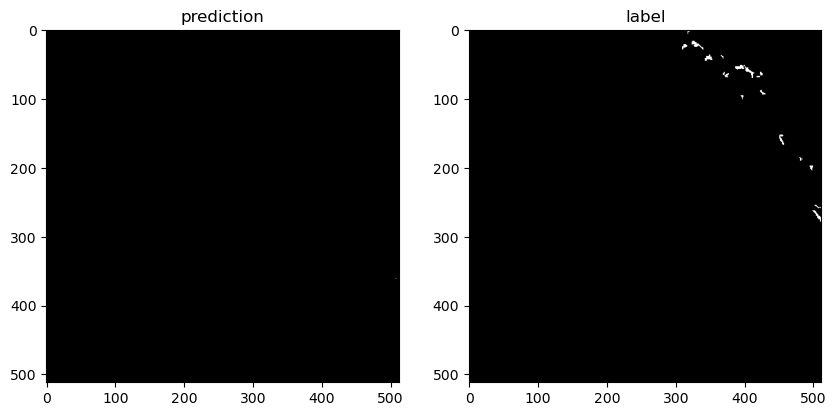

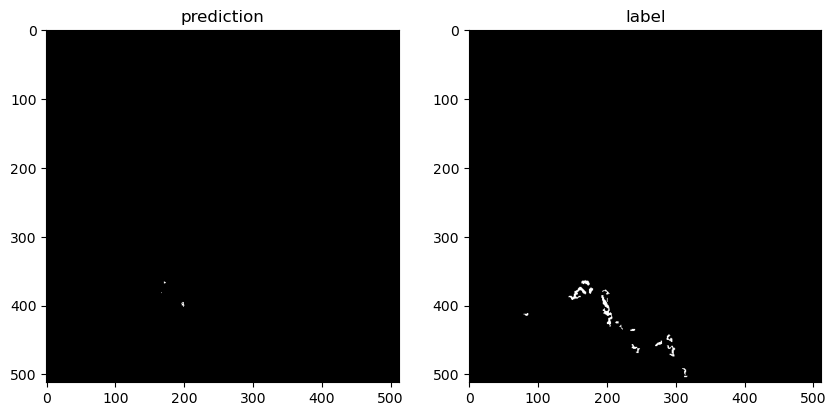

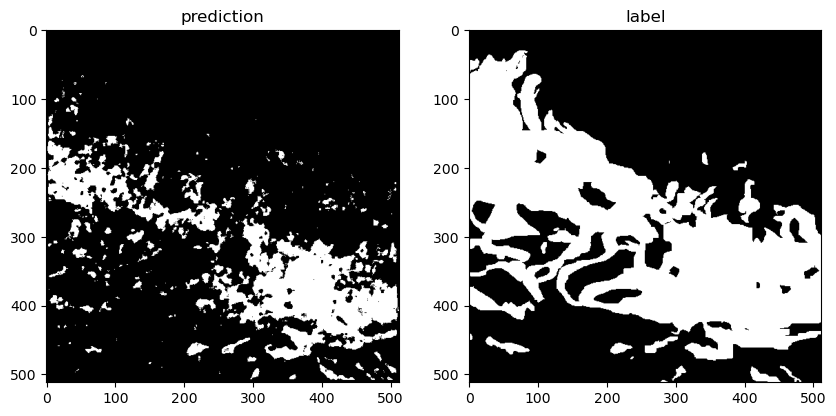

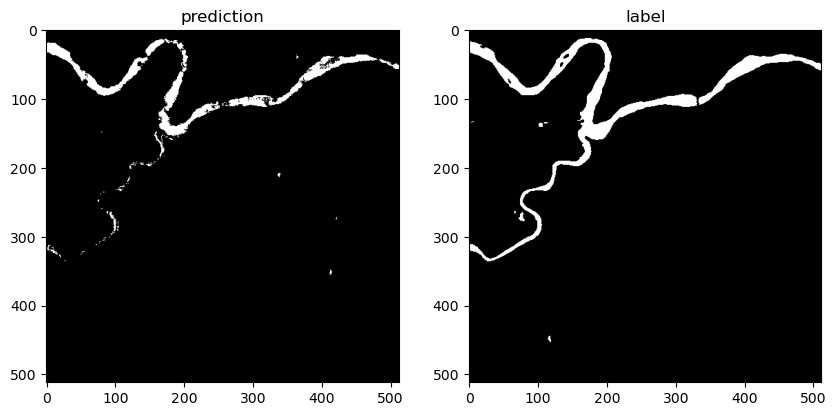

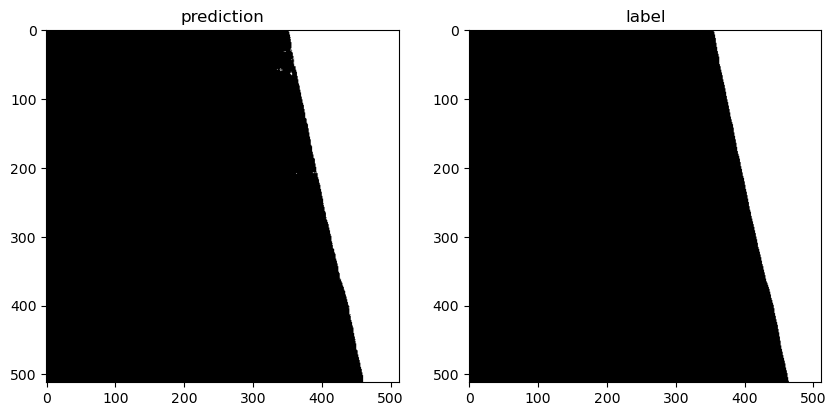

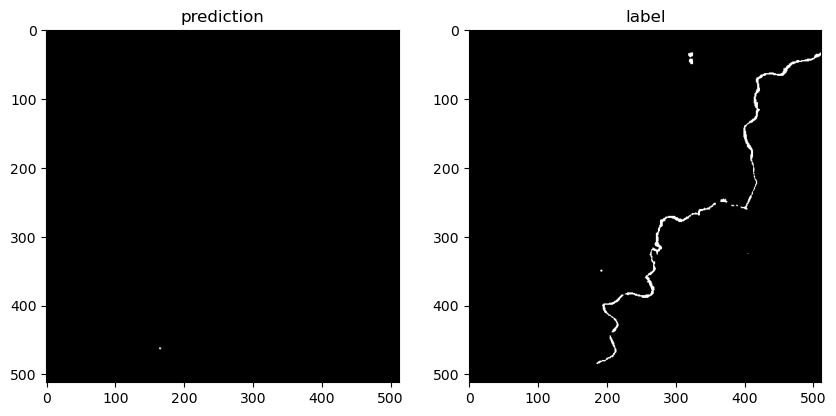

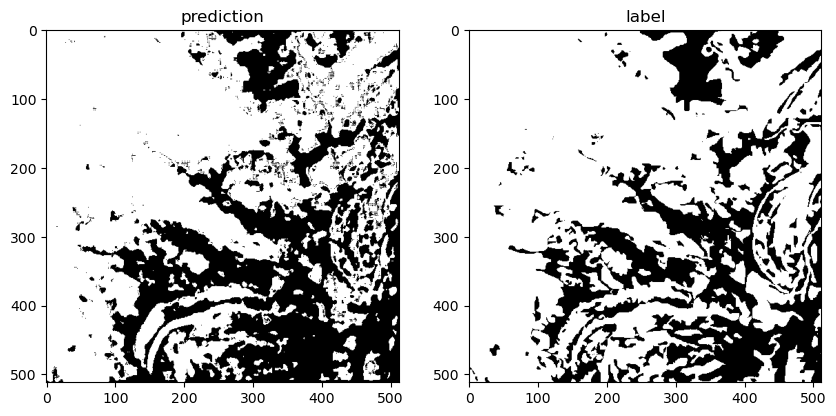

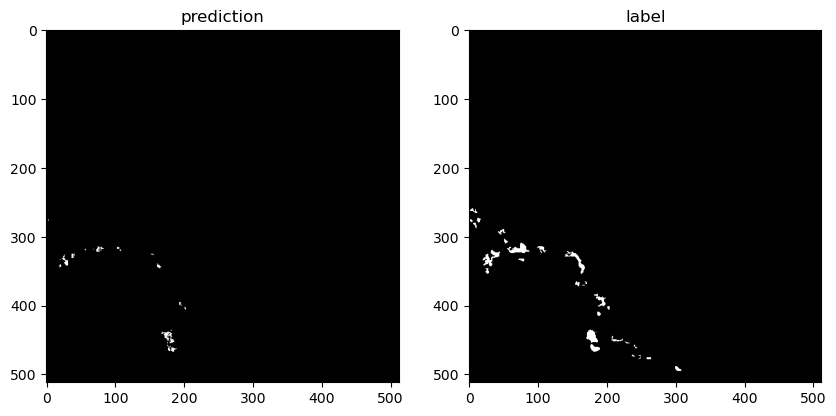

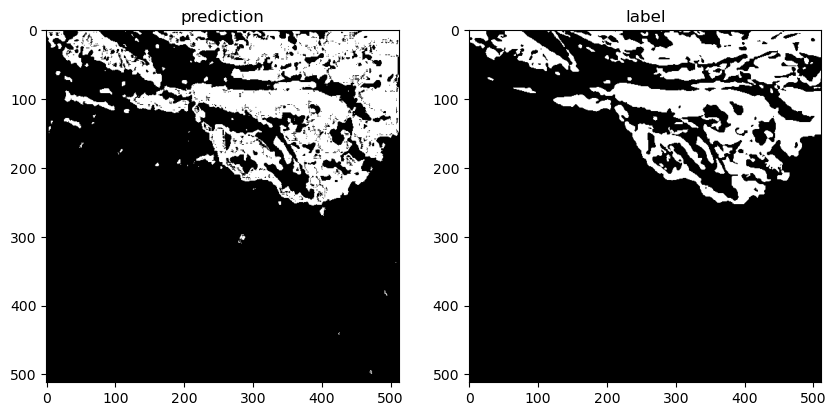

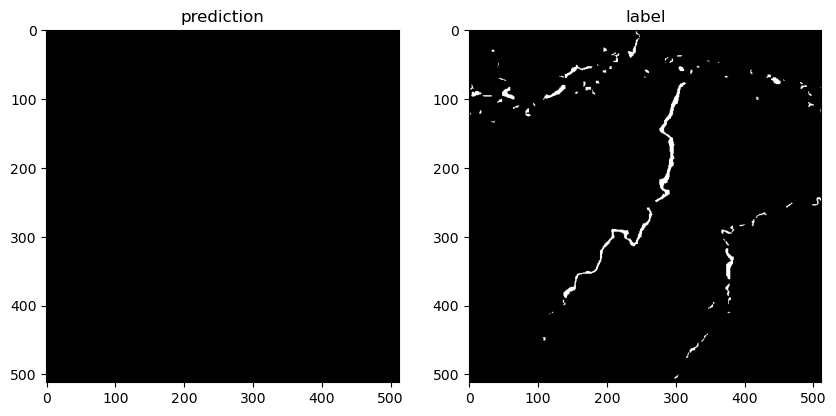

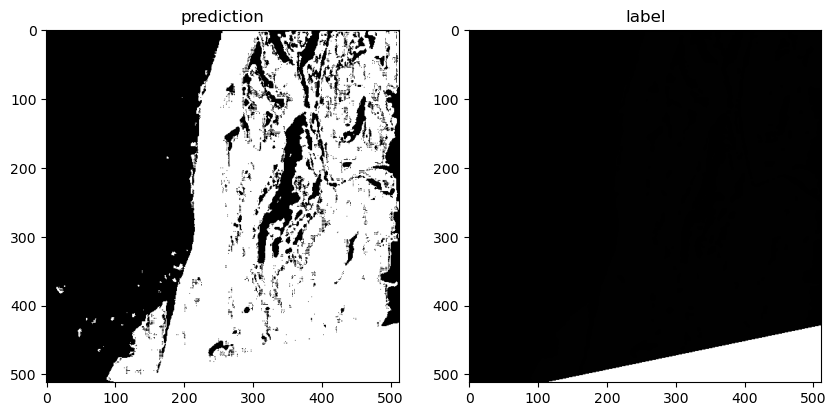

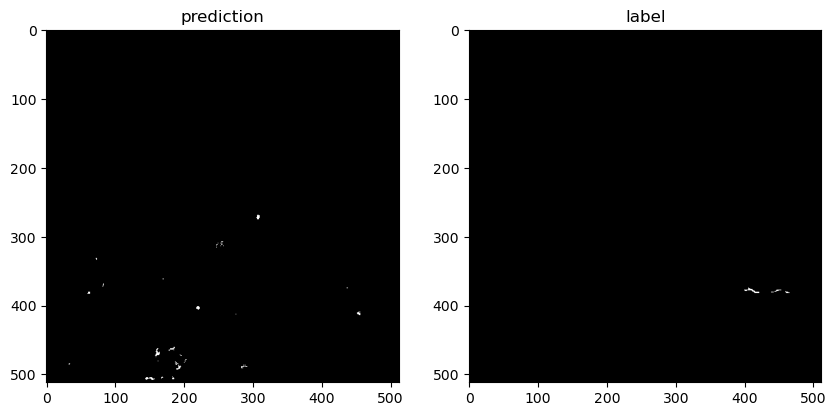

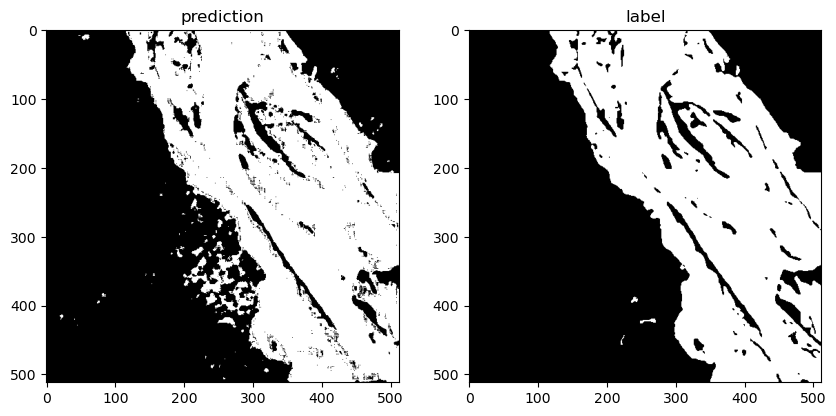

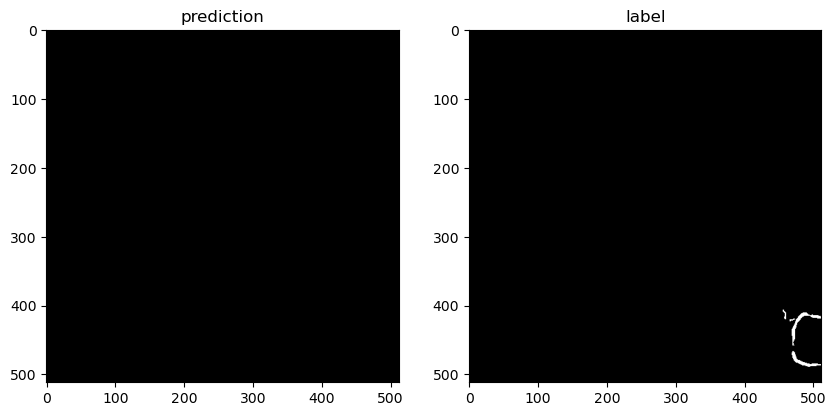

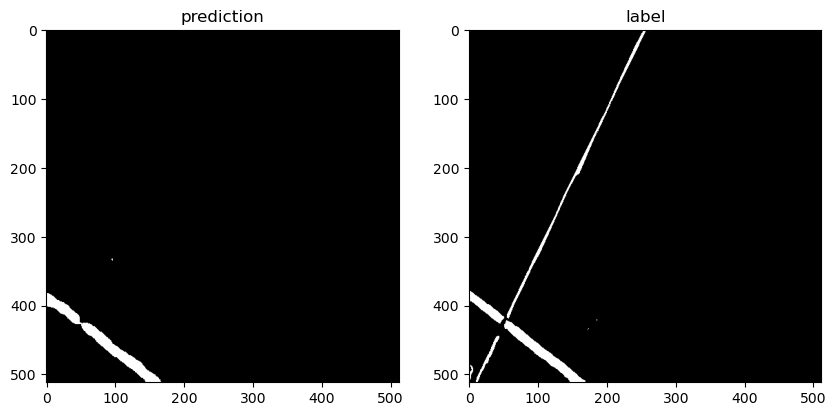

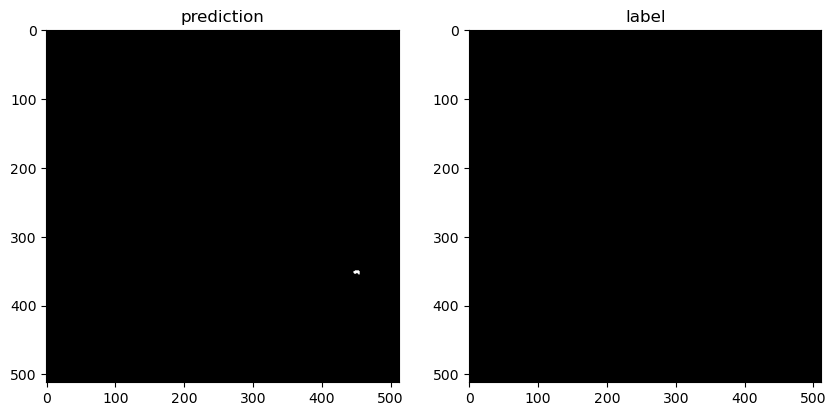

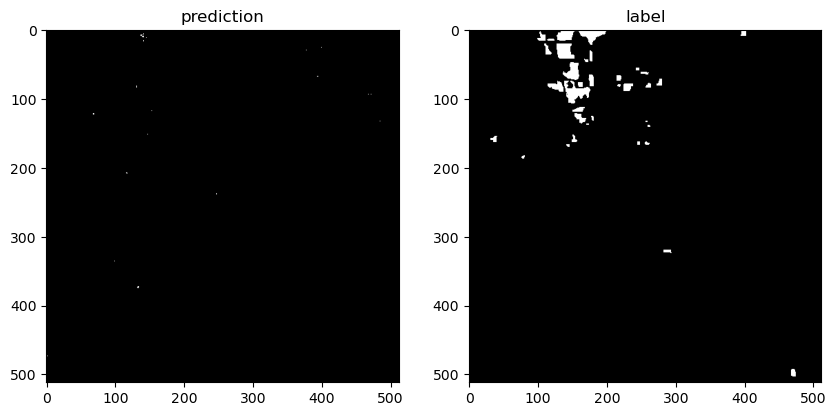

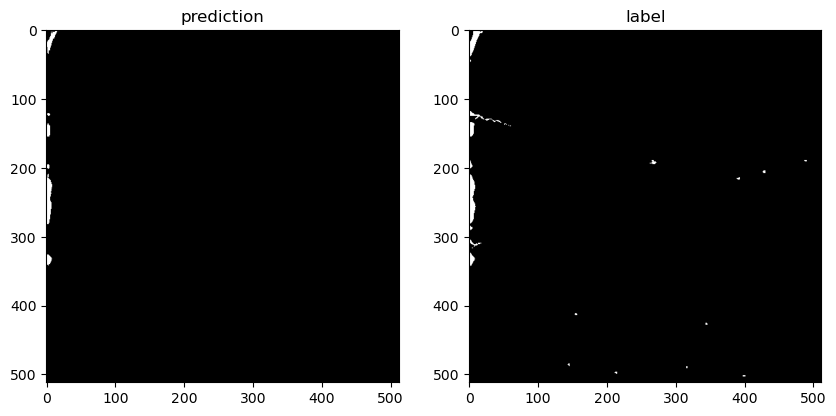

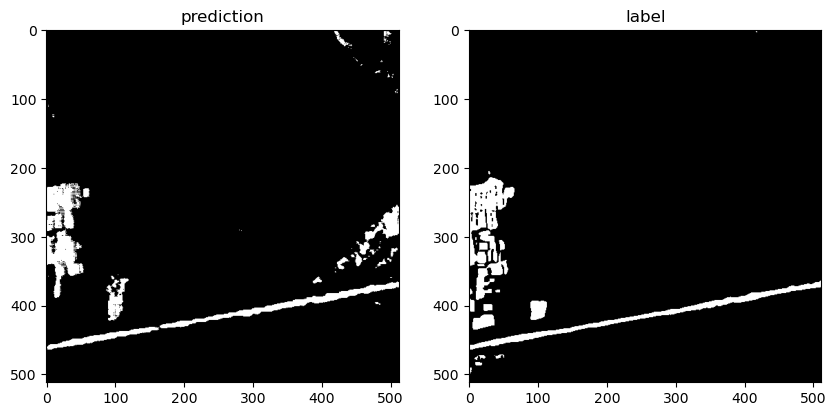

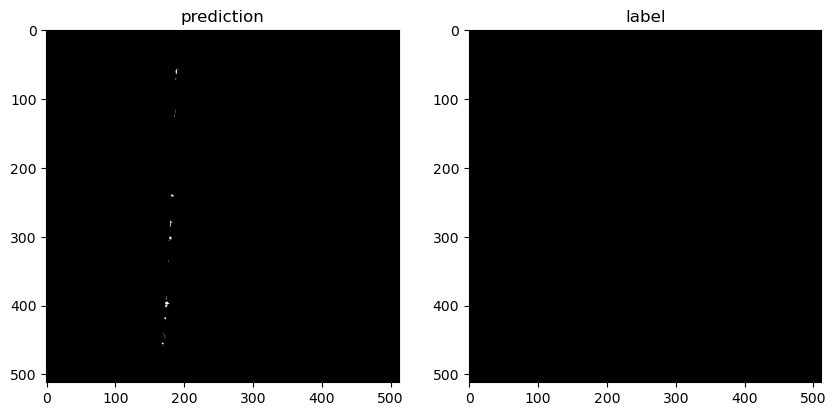

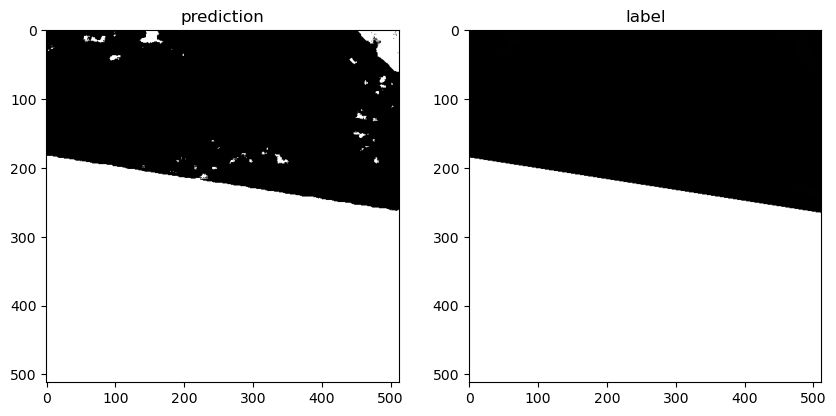

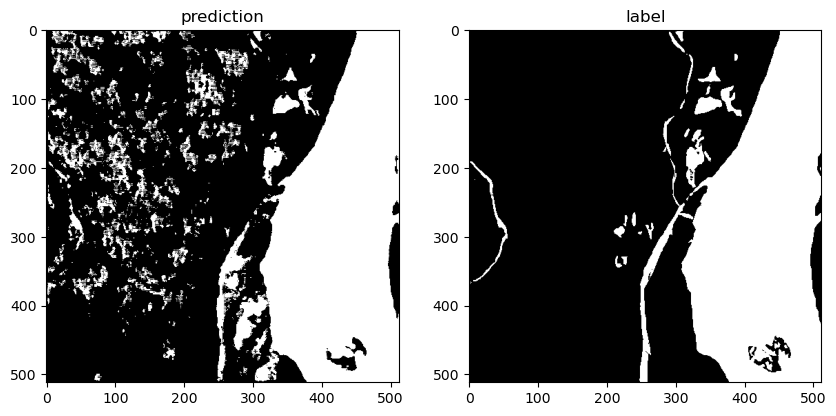

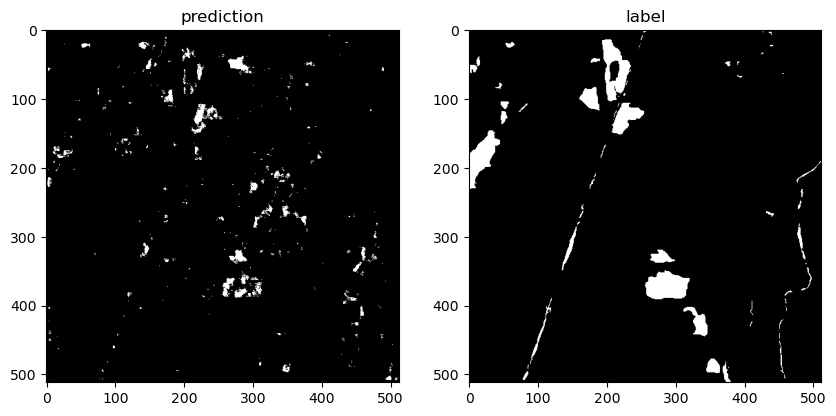

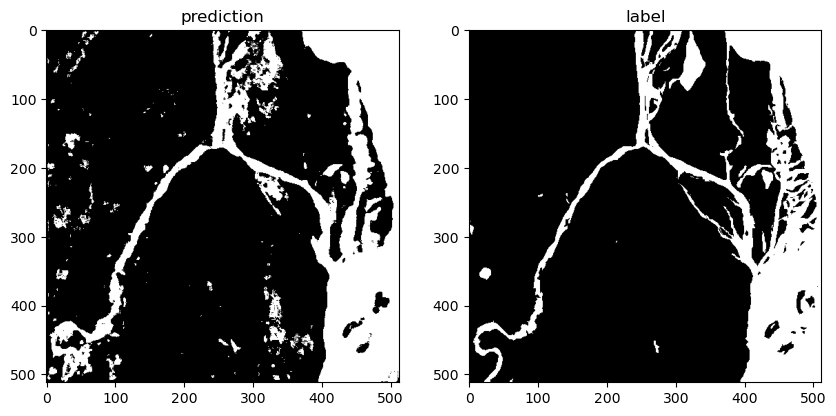

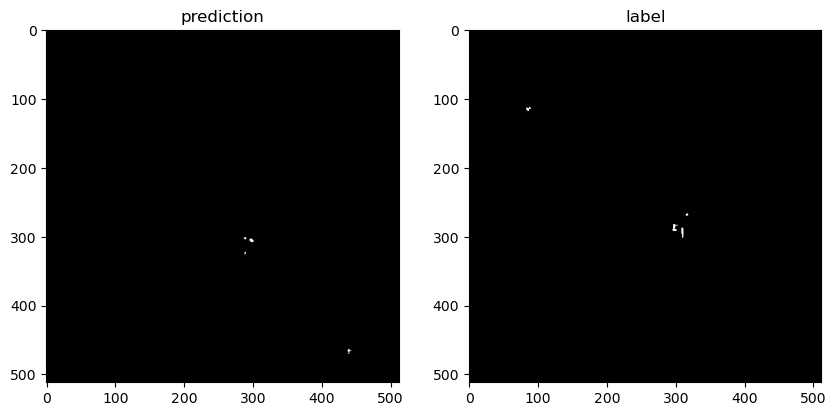

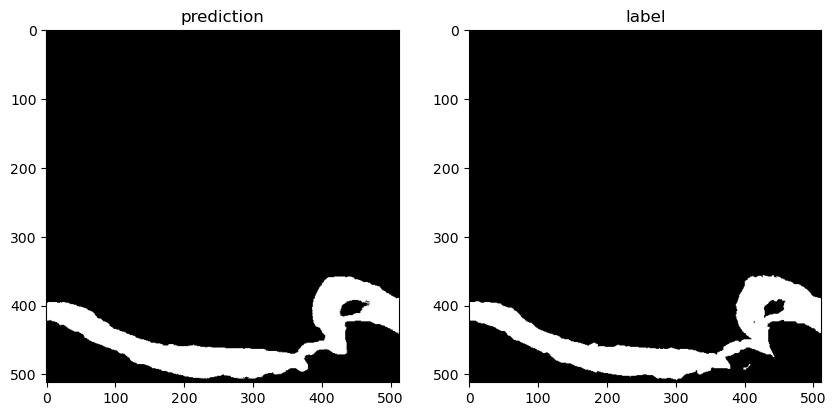

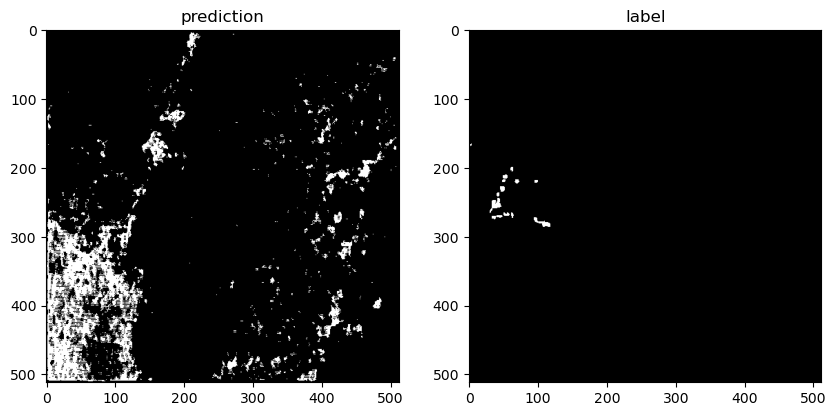

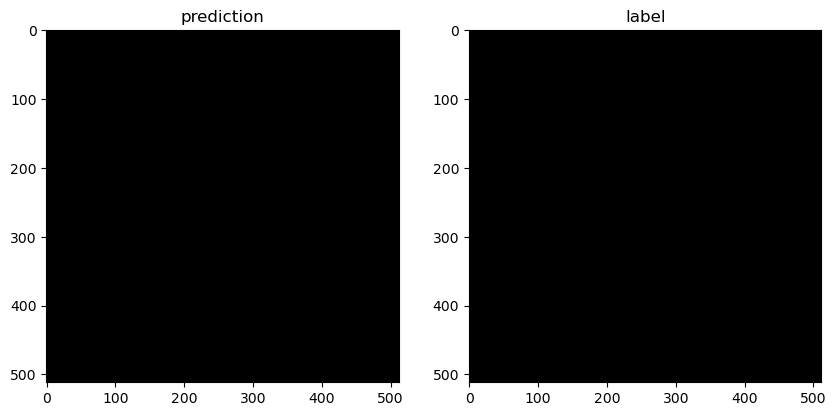

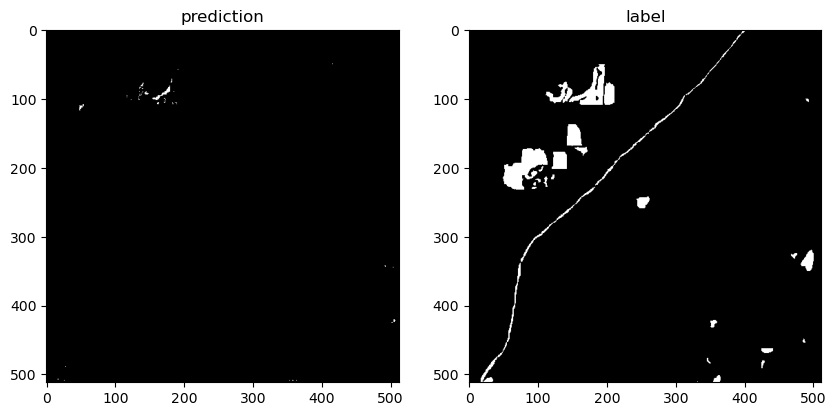

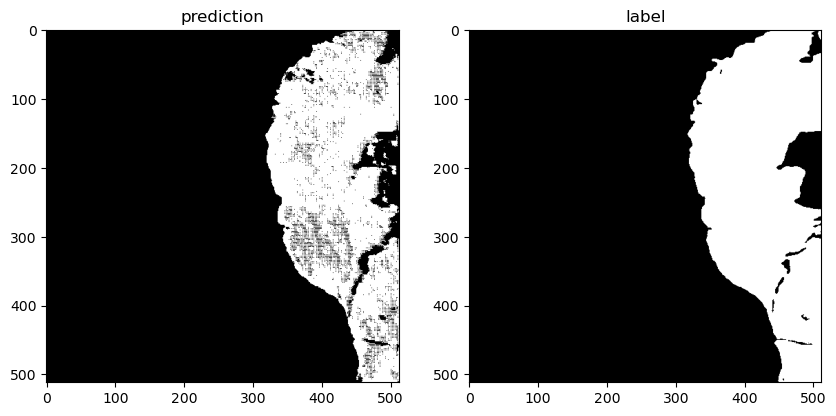

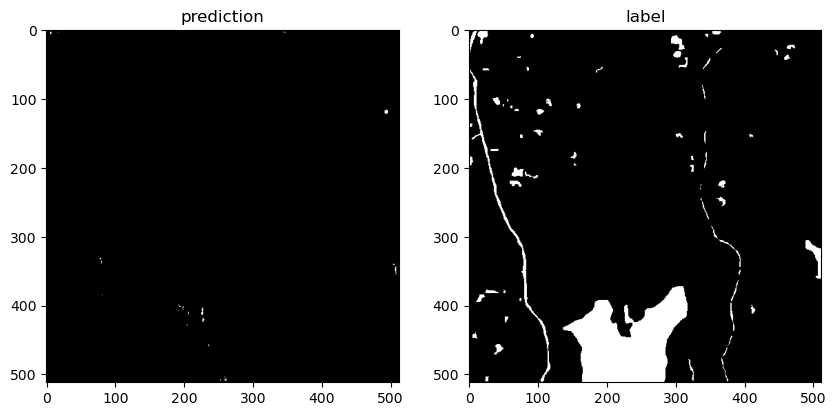

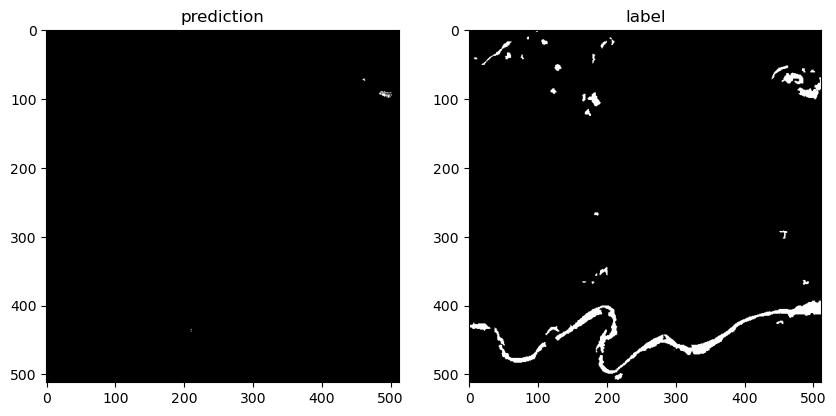

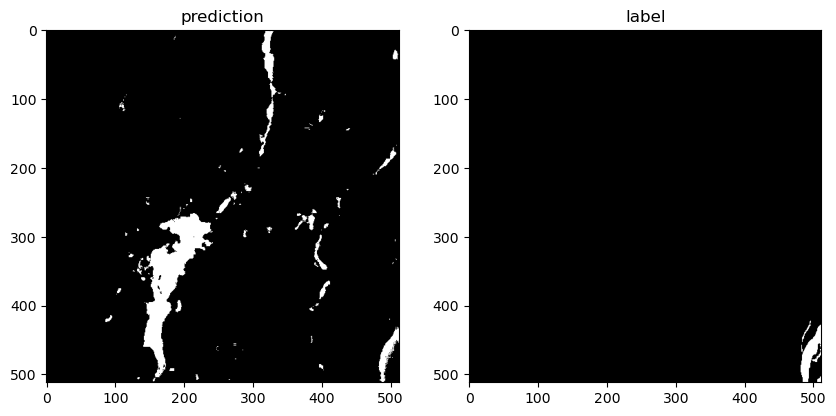

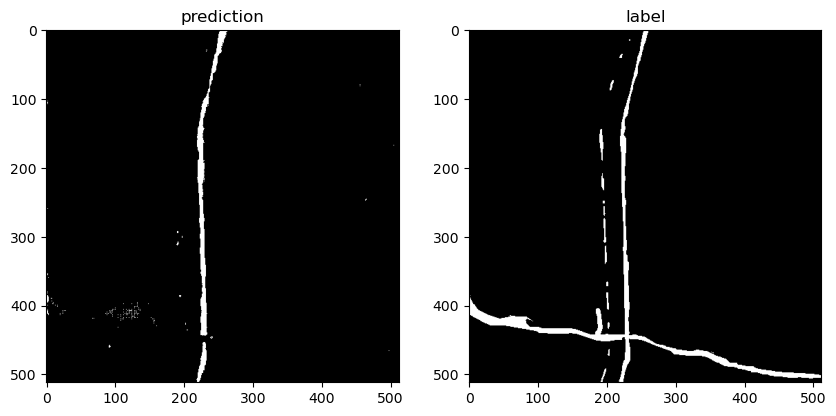

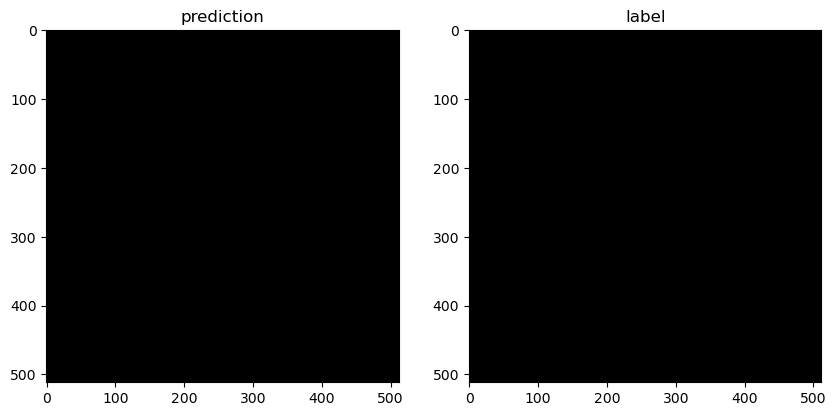

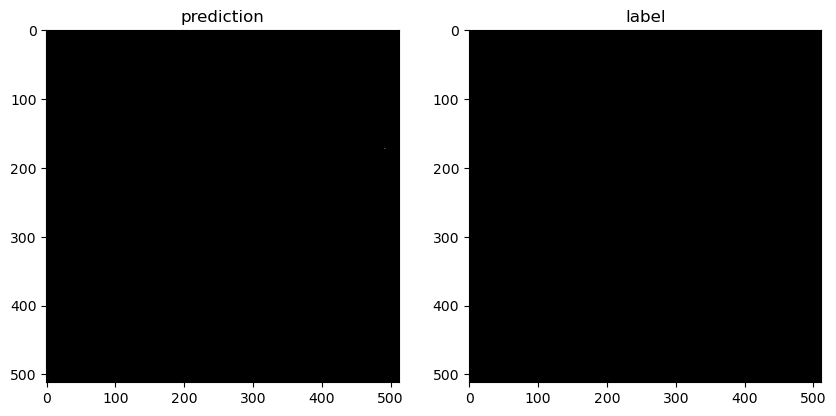

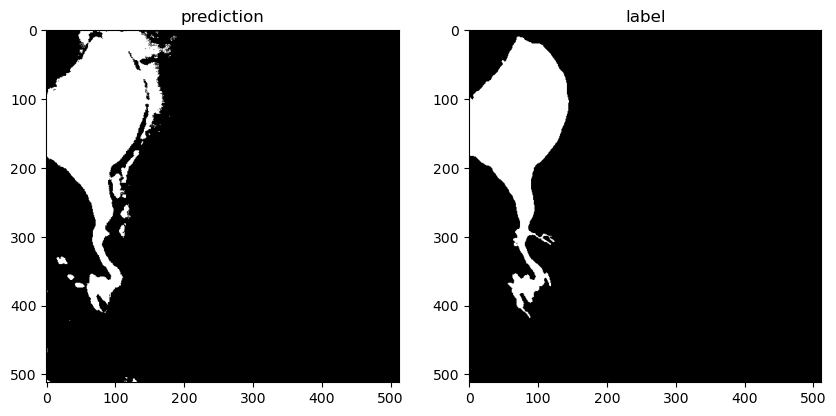

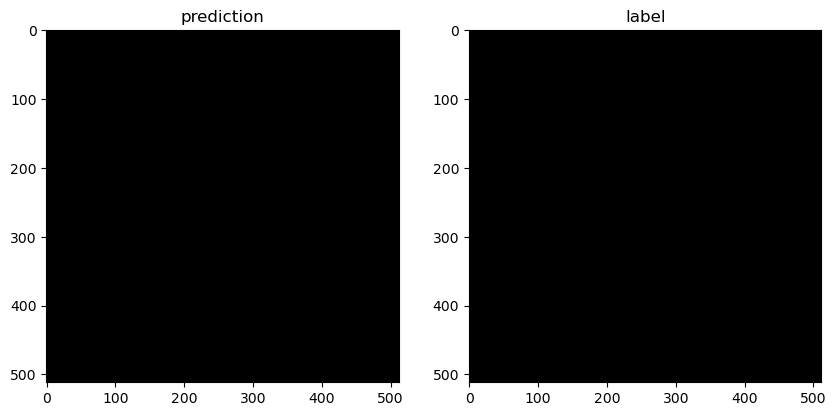

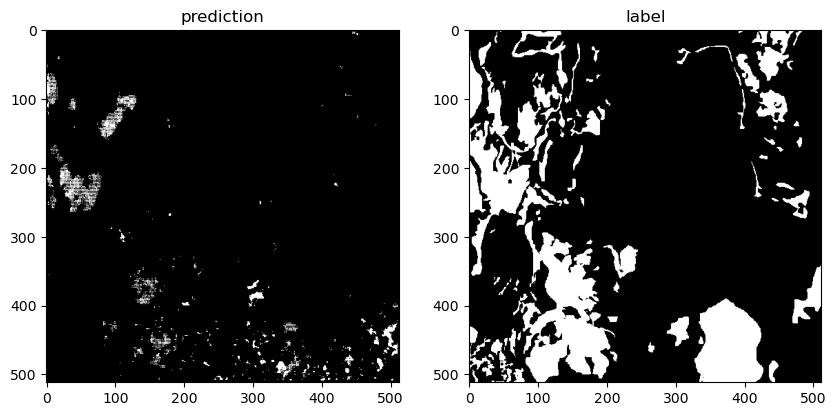

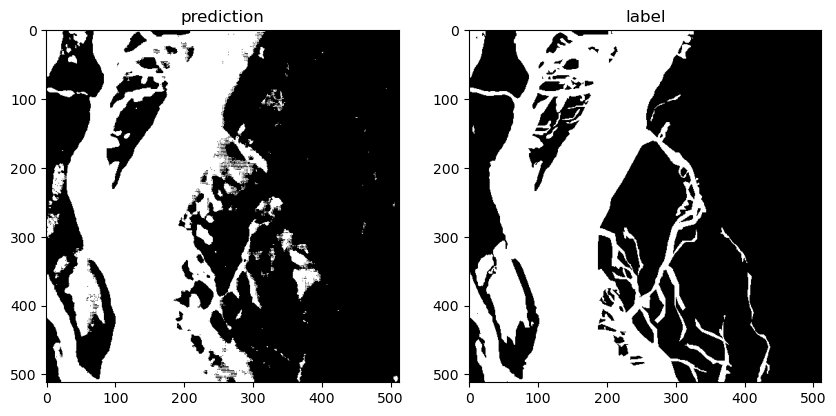

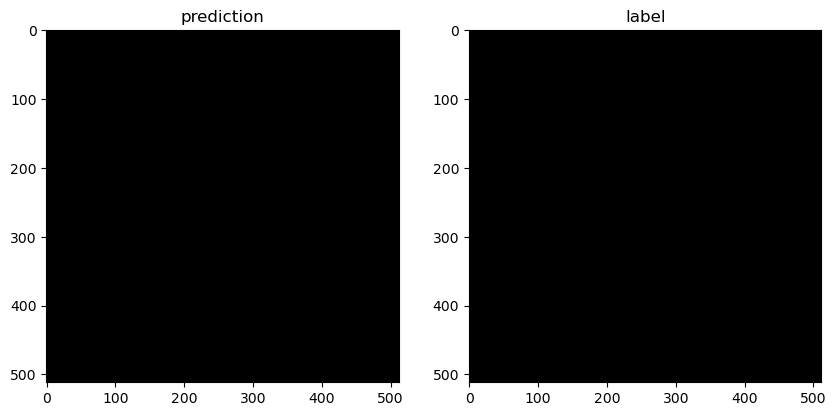

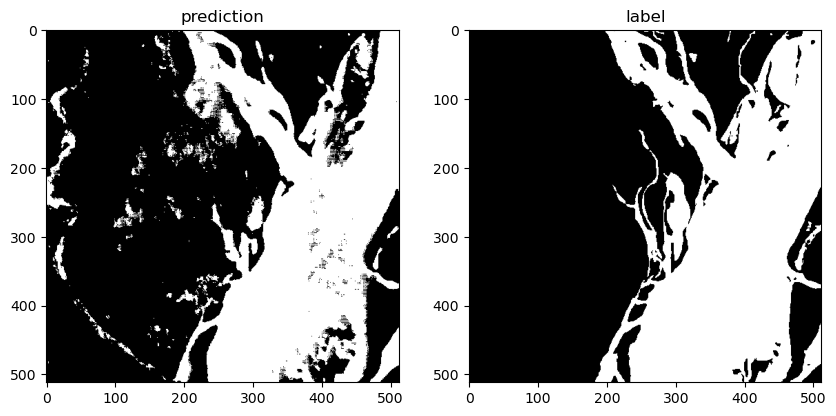

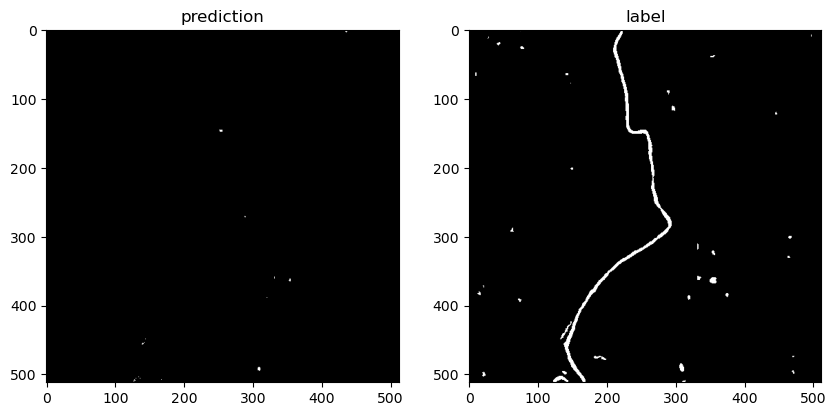

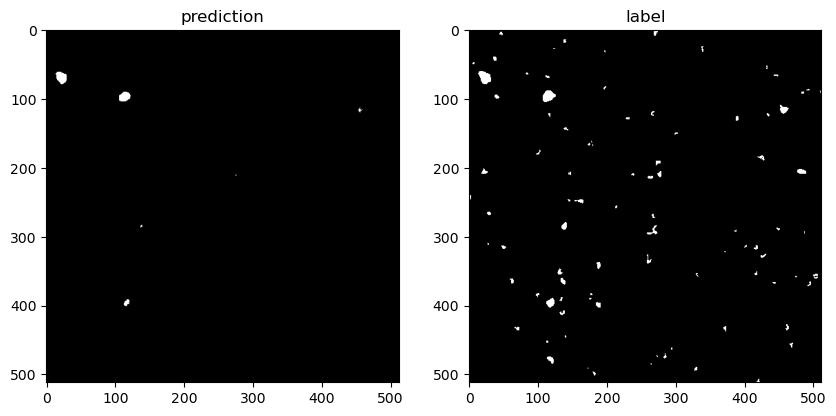

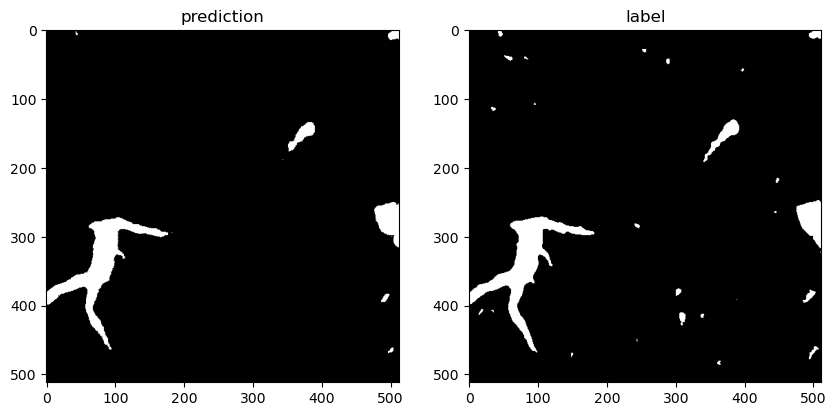

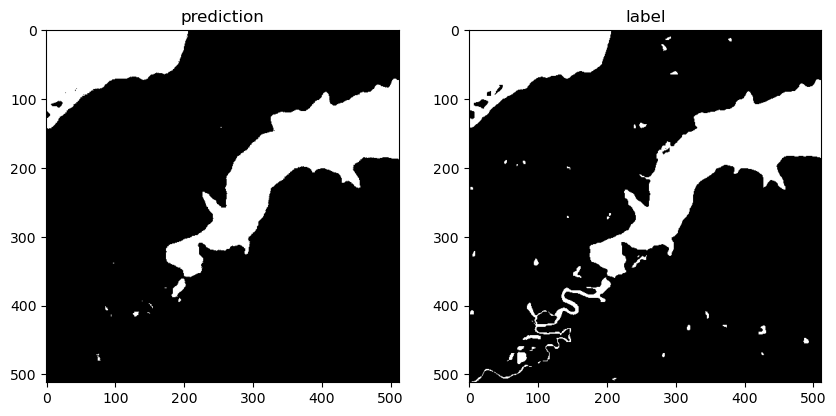

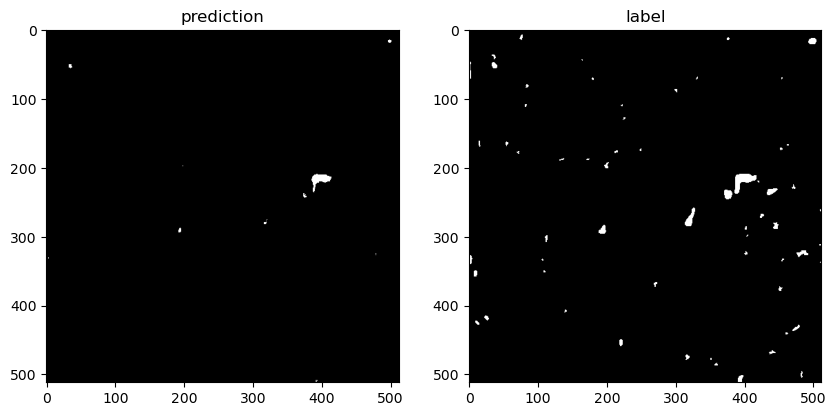

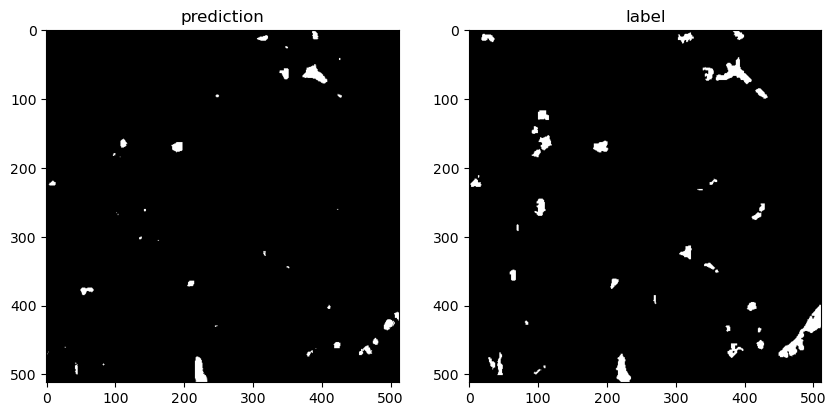

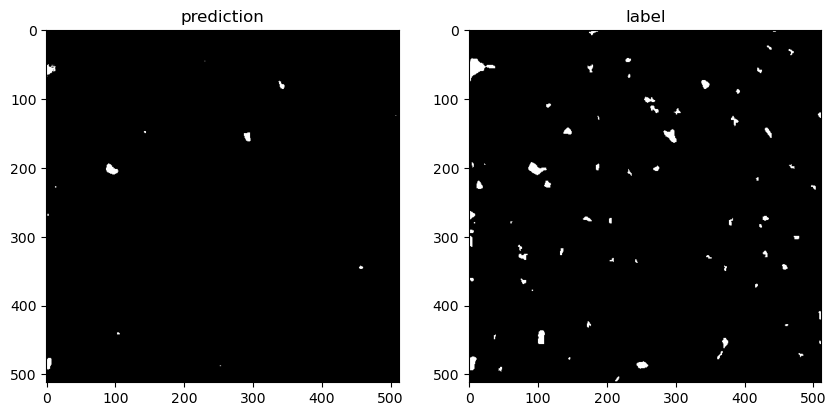

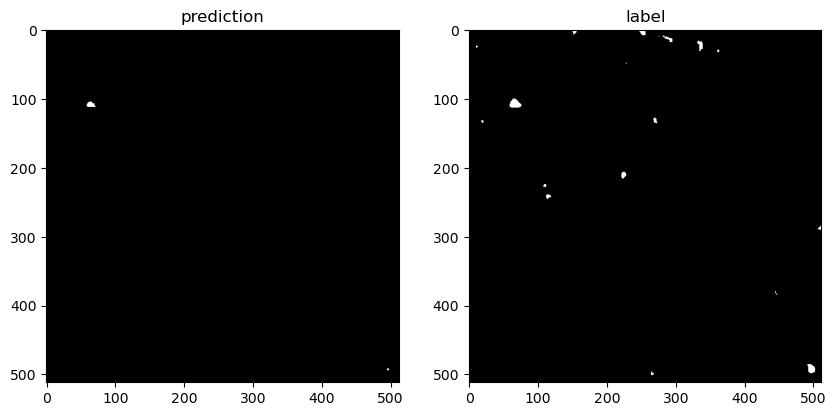

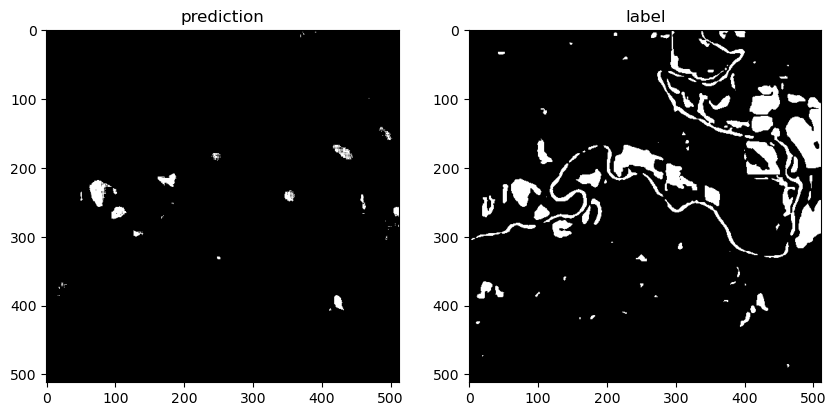

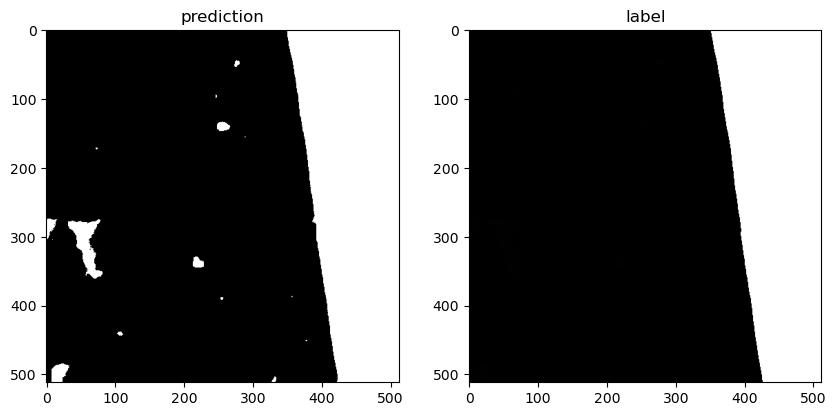

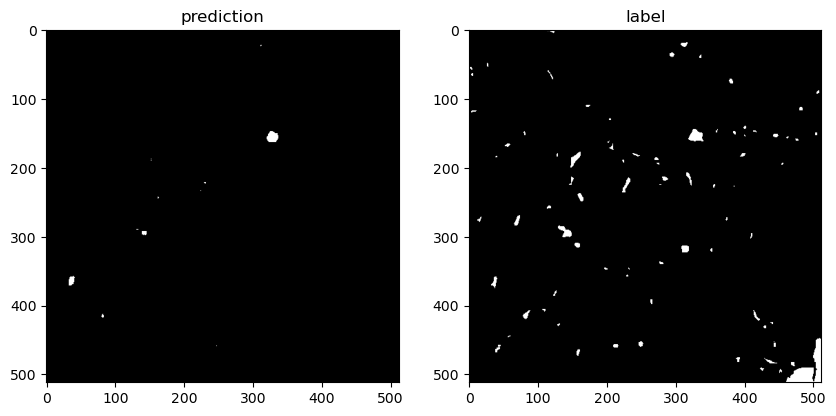

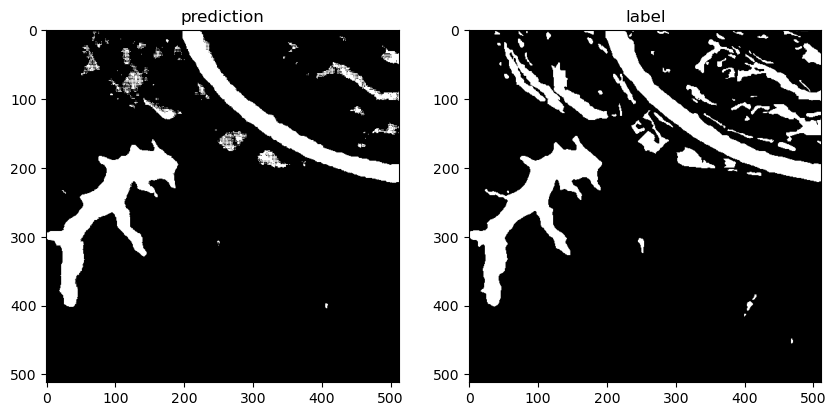

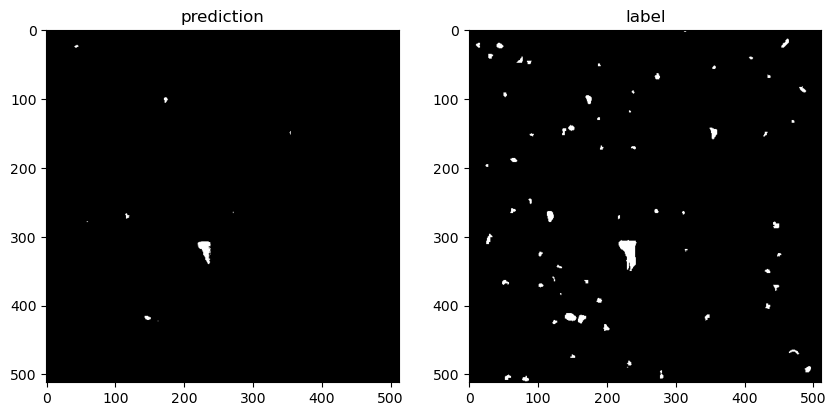

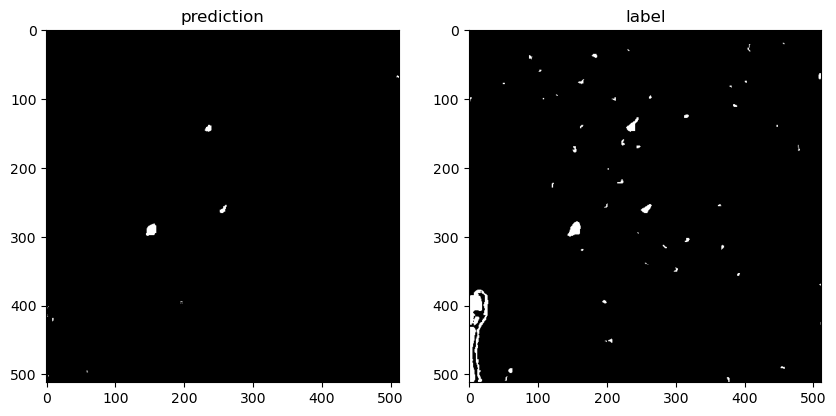

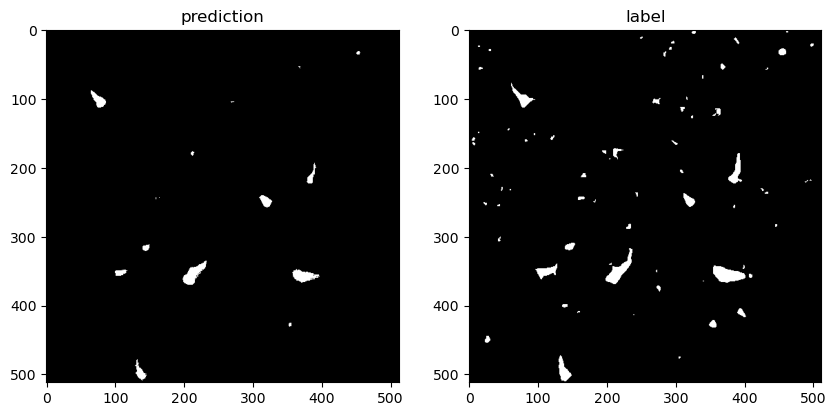

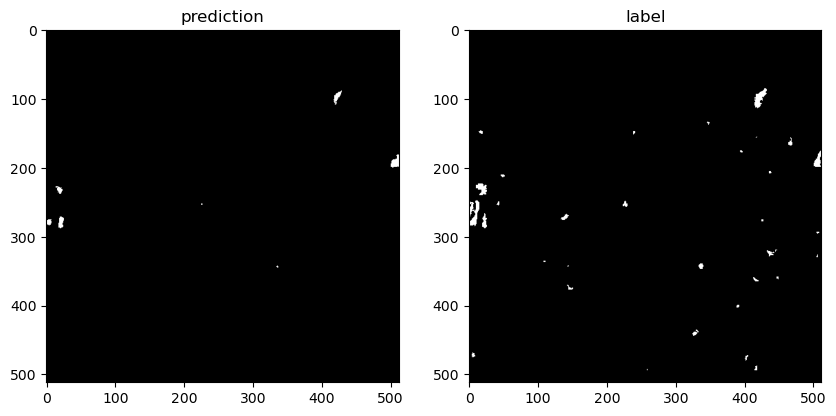

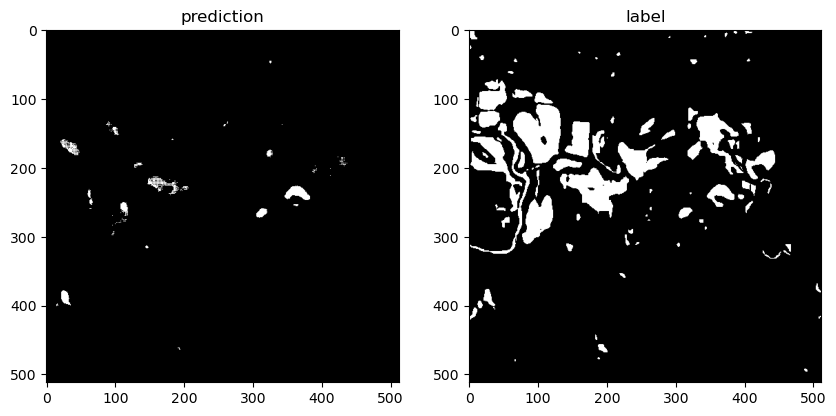

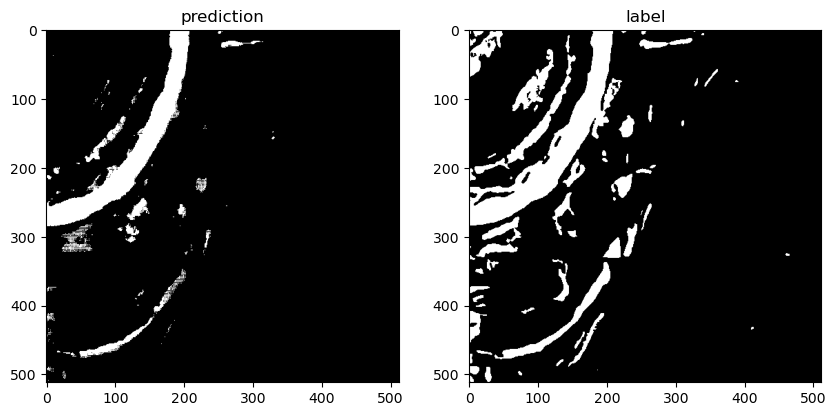

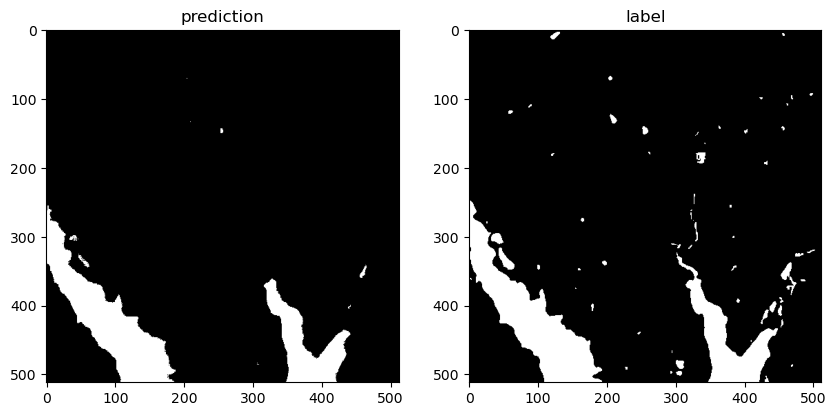

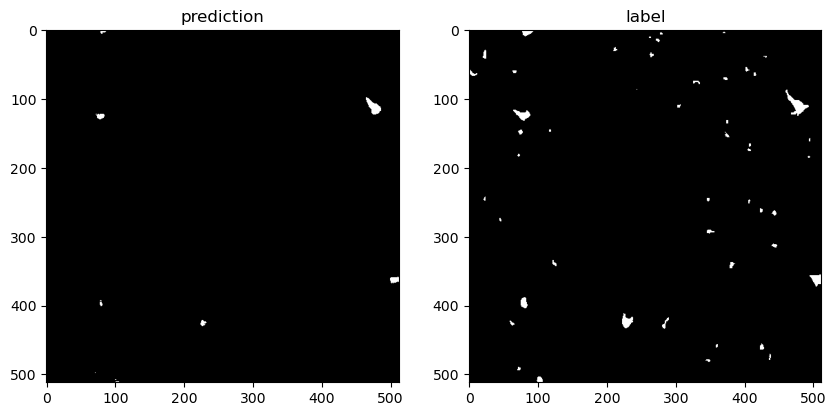

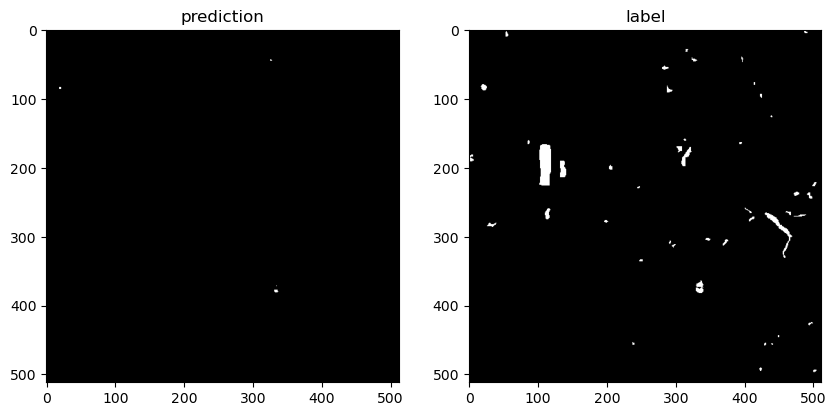

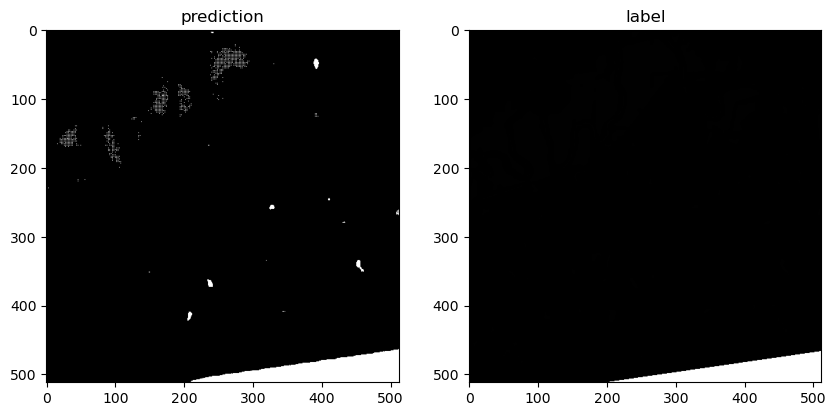

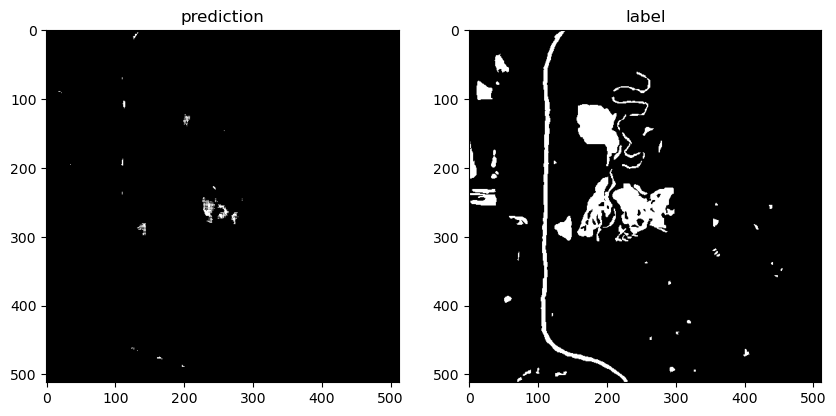

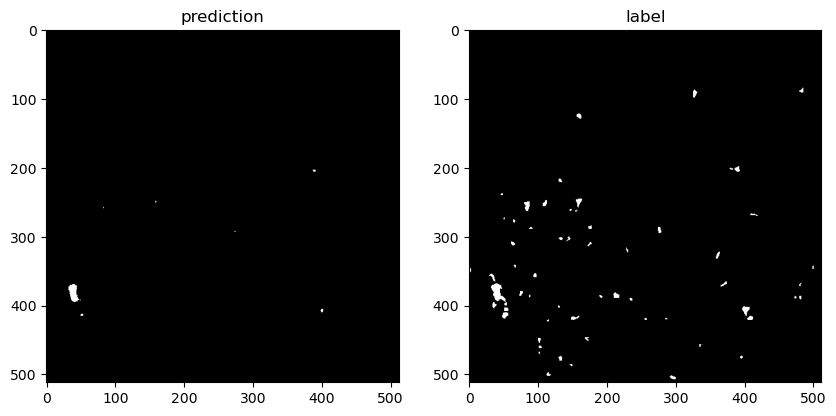

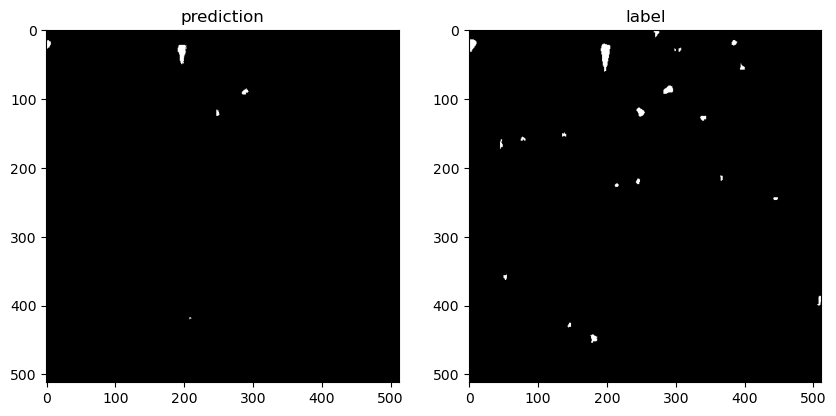

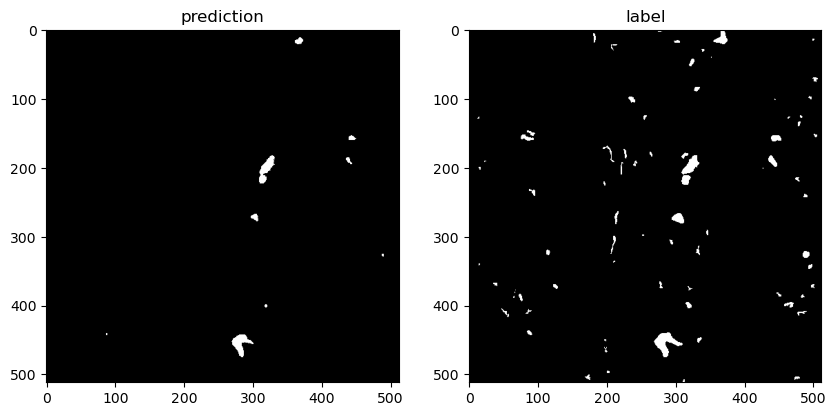

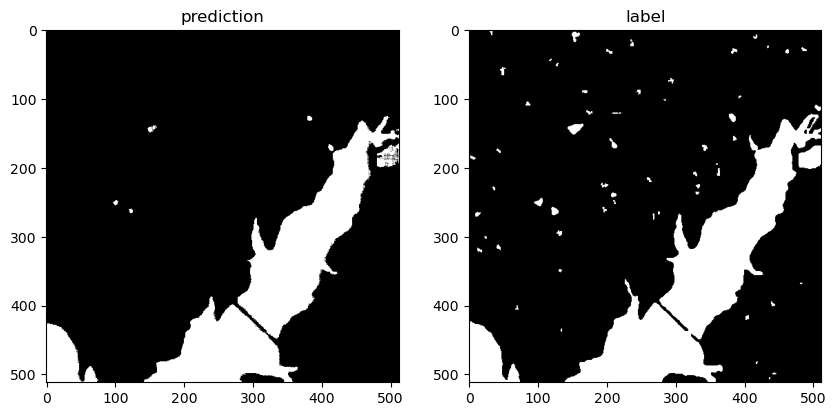

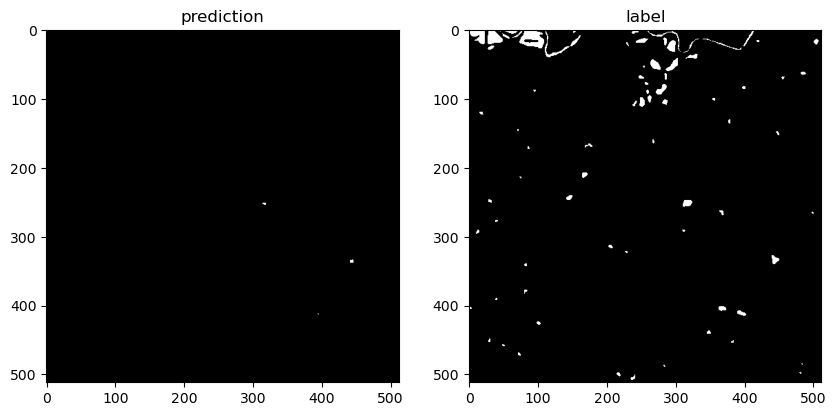

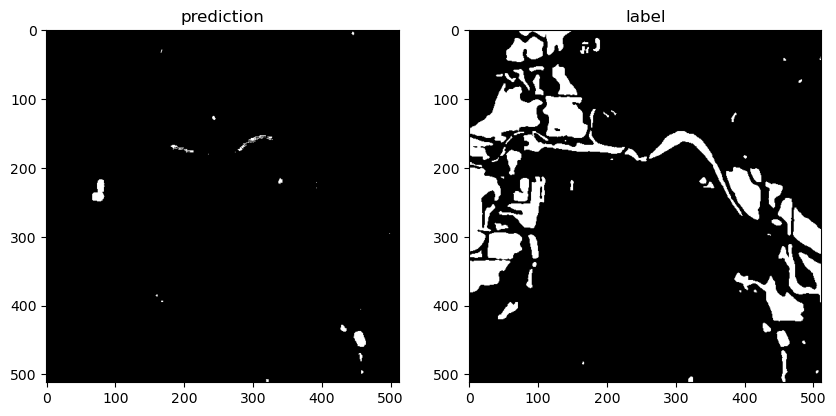

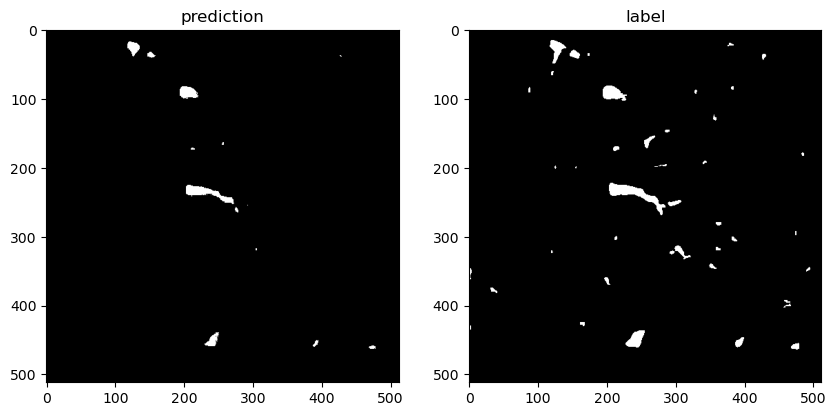

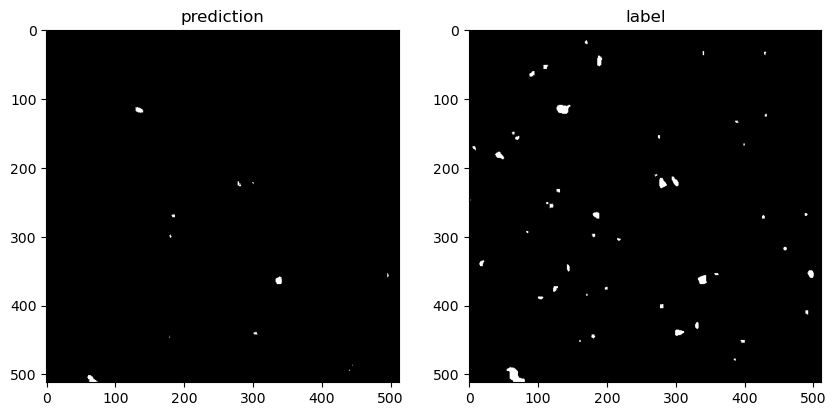

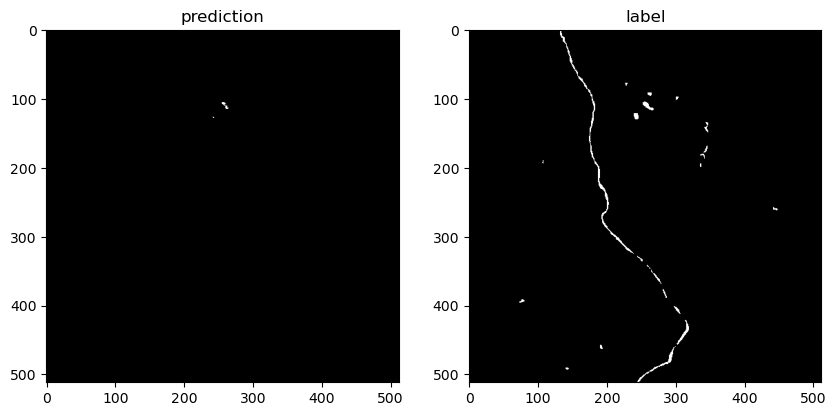

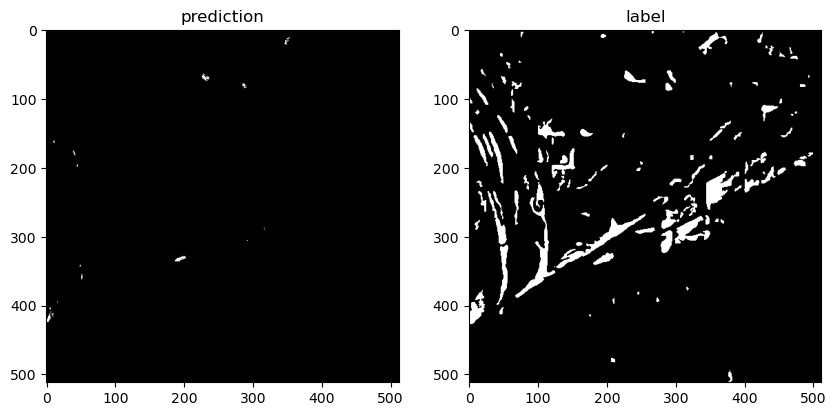

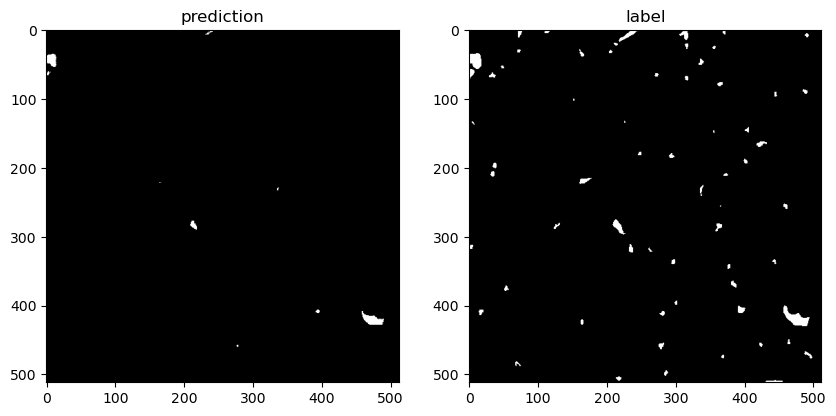

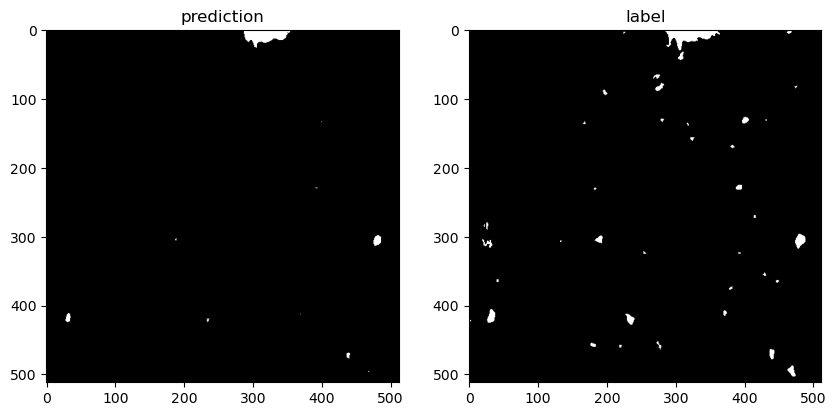

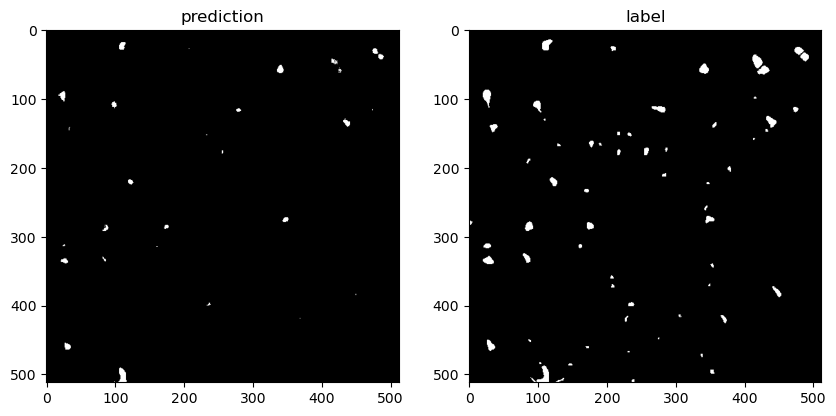

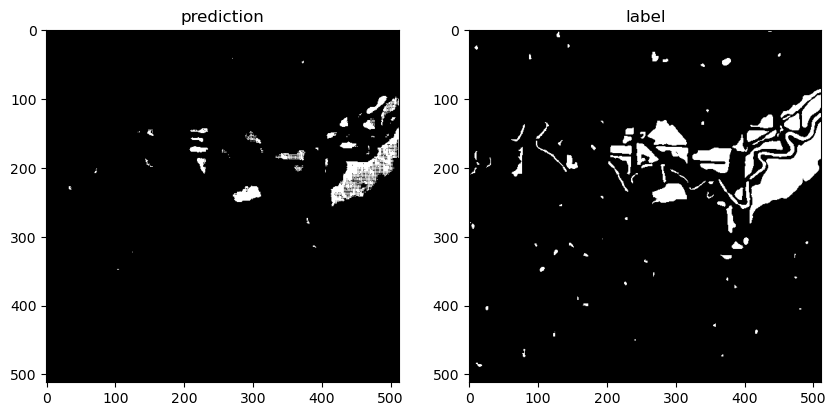

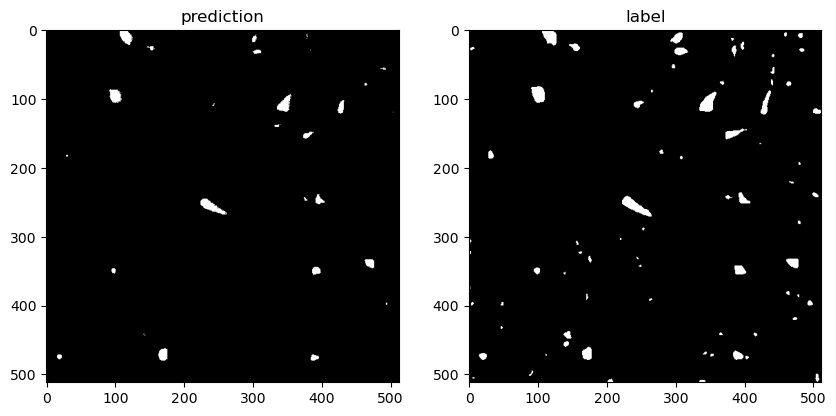

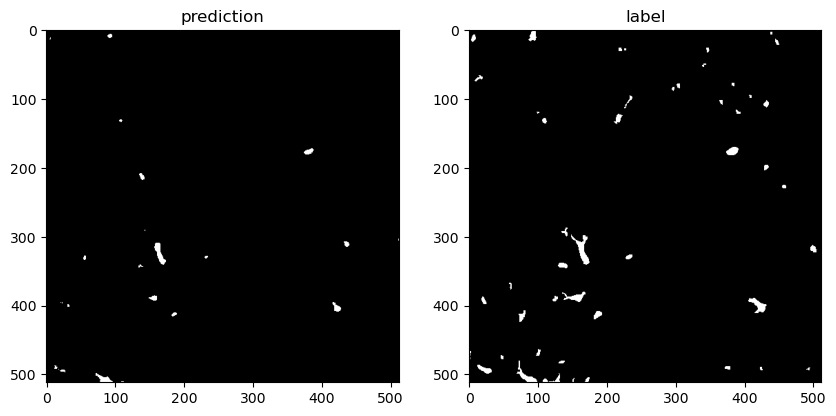

In [11]:
id_ = 10
for id_ in range(100):
#print("jaccard score", result[id_])
    display(train_metadata, id_)

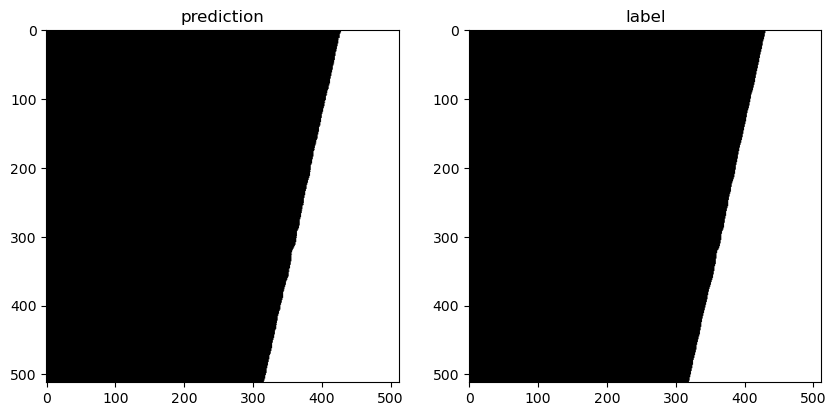

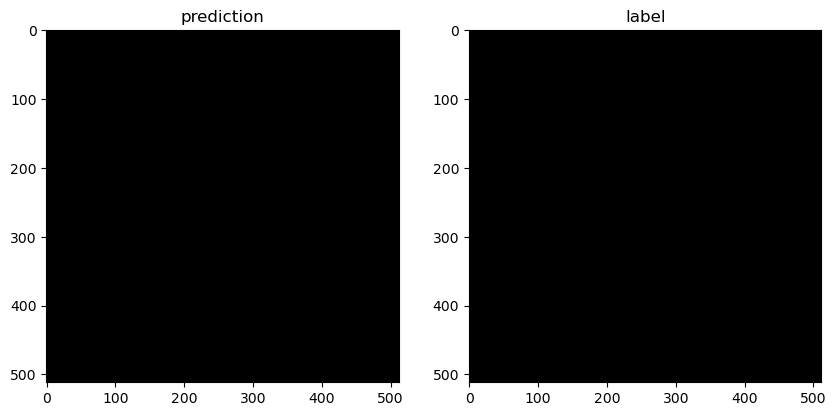

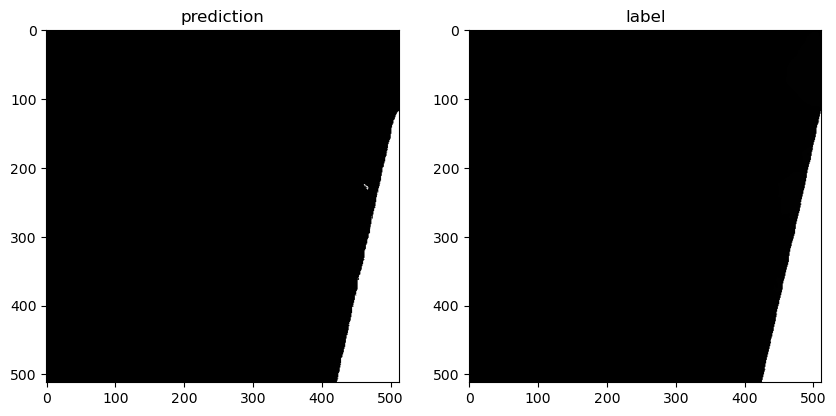

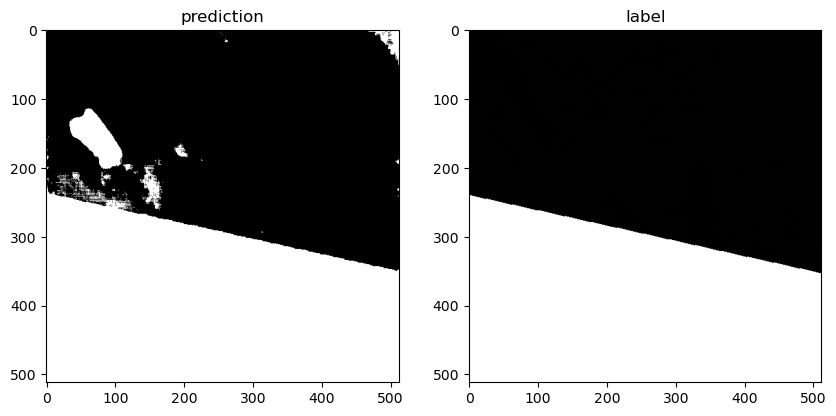

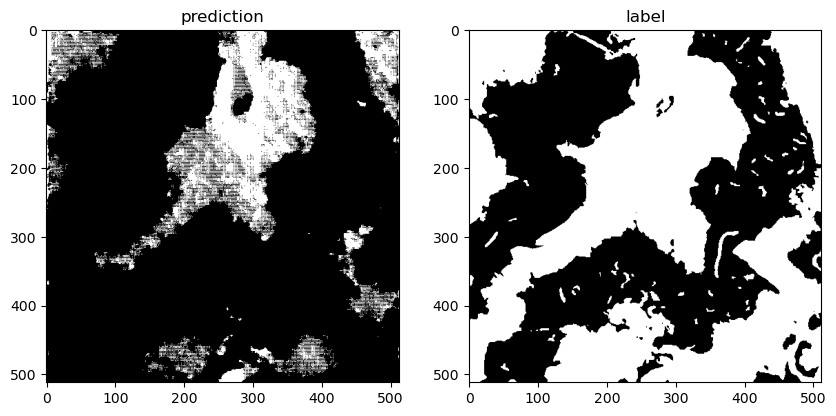

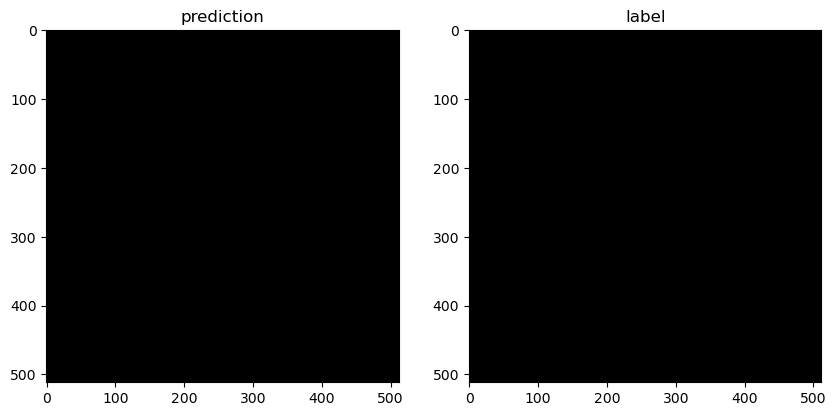

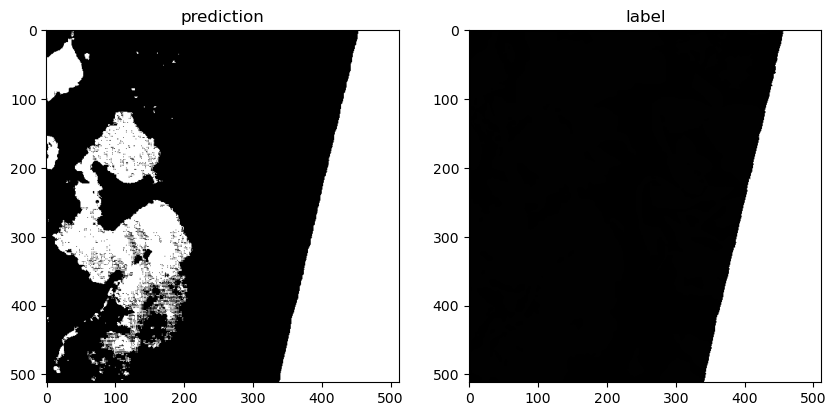

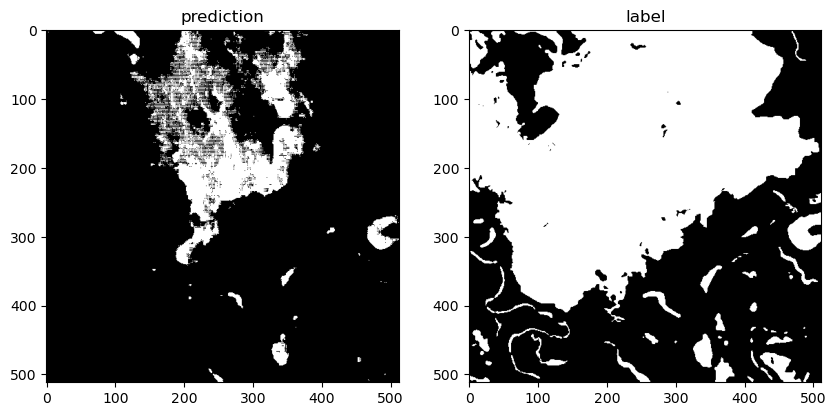

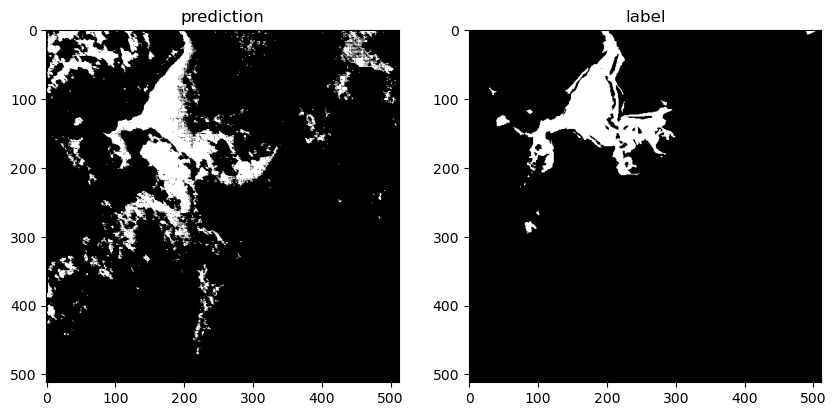

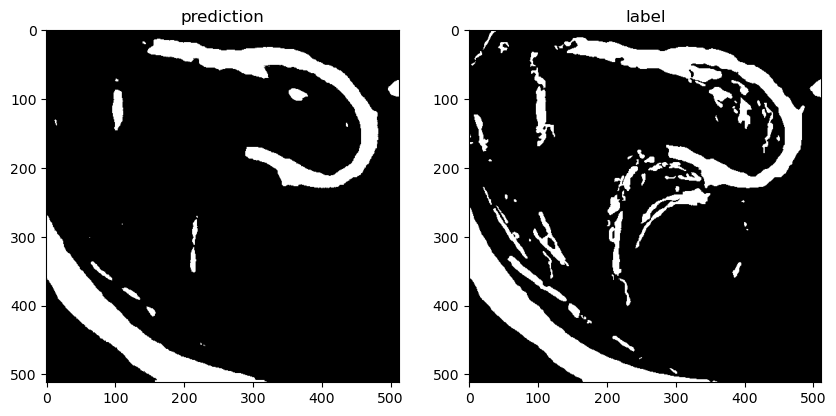

In [12]:
for id_ in range(10):
#print("jaccard score", result[id_])
    display(train_metadata, id_)

In [13]:
best = df.iloc[0:30].index.to_list()
print(best)
for id_ in best:
    print("jaccard score", result[id_])
    display(train_metadata, id_)

NameError: name 'df' is not defined